# `ggplot2`之几何形状

In [2]:
library(tidyverse)

### 1 图形语法
图形语法 “`grammar of graphics`” (“`ggplot2`” 中的`gg`就来源于此) 使用图层(`layer`)去描述和构建图形，下图是ggplot2图层概念的示意图![image.png](image/making_a_ggplot.jpeg)

![image.png](image/how_to_plot.png)

### 2 图形部件
一张统计图形就是从数据到几何形状(`geometric object`，缩写`geom`)所包含的图形属性(`aesthetic attribute`，缩写`aes`)的一种映射。

1.`data`: 数据框`data.frame` (注意，不支持向量`vector`和列表`list`类型）


2.`aes`: 数据框中的数据变量映射到图形属性。什么叫图形属性？就是图中点的位置、形状，大小，颜色等眼睛能看到的东西。什么叫映射？就是一种对应关系，比如数学中的函数`b = f(a)`就是`a`和`b`之间的一种映射关系, `a`的值决定或者控制了`b`的值，在`ggplot2`语法里，`a`就是我们输入的数据变量，`b`就是图形属性， 这些图形属性包括：
- x（x轴方向的位置）
- y（y轴方向的位置）
- color（点或者线等元素的颜色）
- size（点或者线等元素的大小）
- shape（点或者线等元素的形状）
- alpha（点或者线等元素的透明度）

3.`geoms`: 几何形状，确定我们想画什么样的图，一个`geom_***`确定一种形状。更多几何形状推荐阅读这里

- `geom_bar()`
- `geom_density()`
- `geom_freqpoly()`
- `geom_histogram()`
- `geom_violin()`
- `geom_boxplot()`
- `geom_col()`
- `geom_point()`
- `geom_smooth()`
- `geom_tile()`
- `geom_density2d()`
- `geom_bin2d()`
- `geom_hex()`
- `geom_count()`
- `geom_text()`
- `geom_sf()`

4.`stats`: 统计变换

5.`scales`: 标度

6.`coord`: 坐标系统

7.`facet`: 分面

8.`layer`： 增加图层

9.`theme`: 主题风格

10.`save`: 保存图片

![image.png](image/grammar-of-graphics.png)

## 开始
R语言数据类型，有字符串型、数值型、因子型、逻辑型、日期型等。 `ggplot2`会将字符串型、因子型、逻辑型默认为离散变量，而数值型默认为连续变量，将日期时间为日期变量：
- 离散变量: 字符串型, 因子型, 逻辑型

- 连续变量: 双精度数值, 整数数值

- 日期变量: 日期, 时间, 日期时间

我们在呈现数据的时候，可能会同时用到多种类型的数据，比如

- 一个离散

- 一个连续

- 两个离散

- 两个连续

- 一个离散, 一个连续

- 三个连续

### 1 导入数据
后续用到的所有数据均可在`https://github.com/Crazzy-Rabbit/R_for_Data_Science/tree/master/demo_data`下载

In [6]:
gapdata <- read_csv("./demo_data/gapminder.csv")

Rows: 1704 Columns: 6
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): country, continent
dbl (4): year, lifeExp, pop, gdpPercap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
gapdata %>% head()

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

### 2 检查数据

是否有缺失值

In [10]:
gapdata %>% 
  summarise(
    across(everything(), ~sum(is.na(.)))
  )

country continent year lifeExp pop gdpPercap
1 0       0         0    0       0   0

## 基本绘图
### 1 柱状图
常用于一个离散变量

`geom_bar()`自动完成对相应变量的`count`

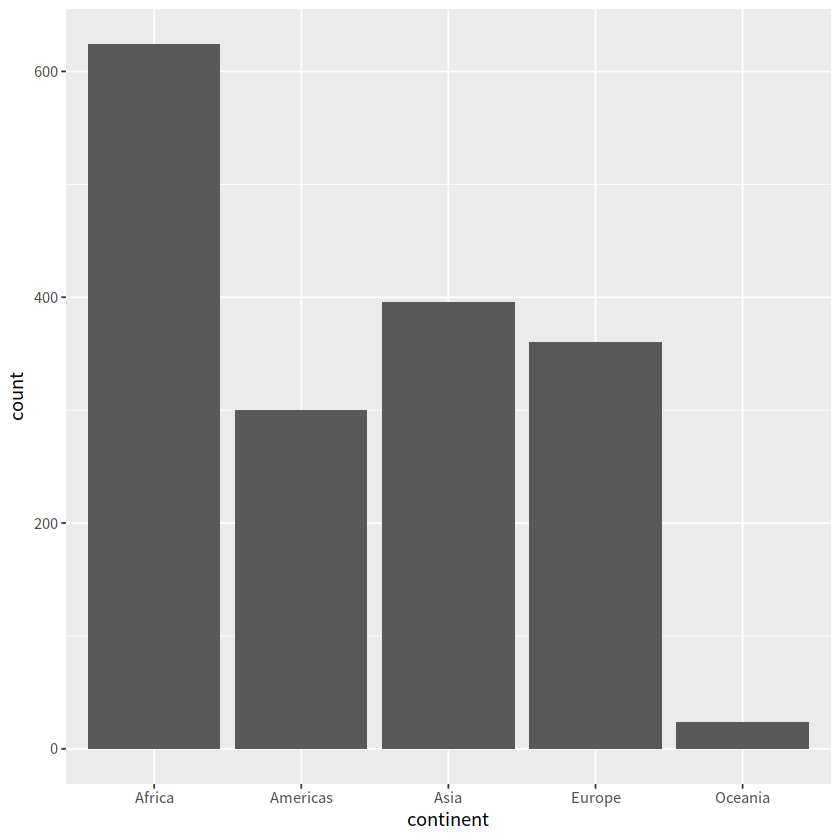

In [11]:
gapdata %>% 
  ggplot(aes(x = continent)) +
  geom_bar()

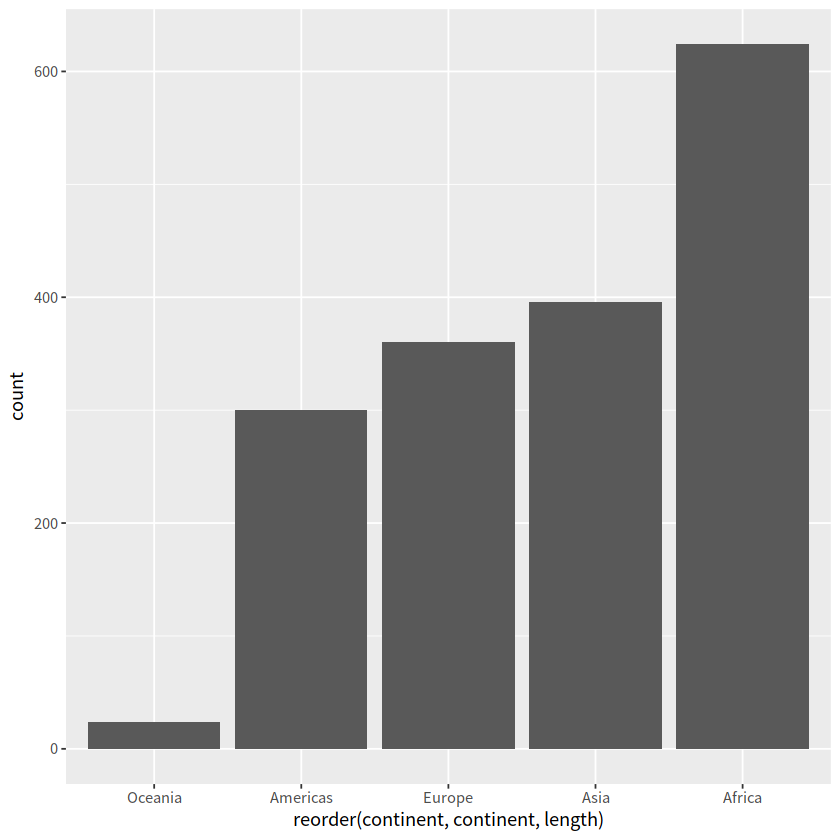

In [13]:
gapdata %>% 
  ggplot(aes(x = reorder(continent, continent, length))) +
  geom_bar()

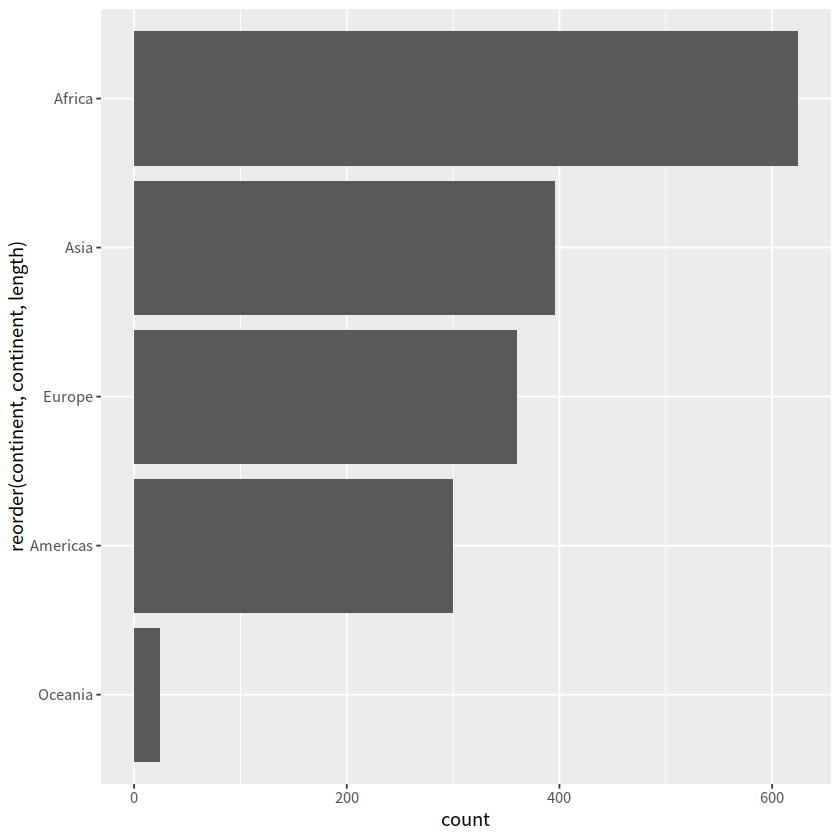

In [17]:
gapdata %>% 
  ggplot(aes(x = reorder(continent, continent, length))) +
  geom_bar() +
  coord_flip()

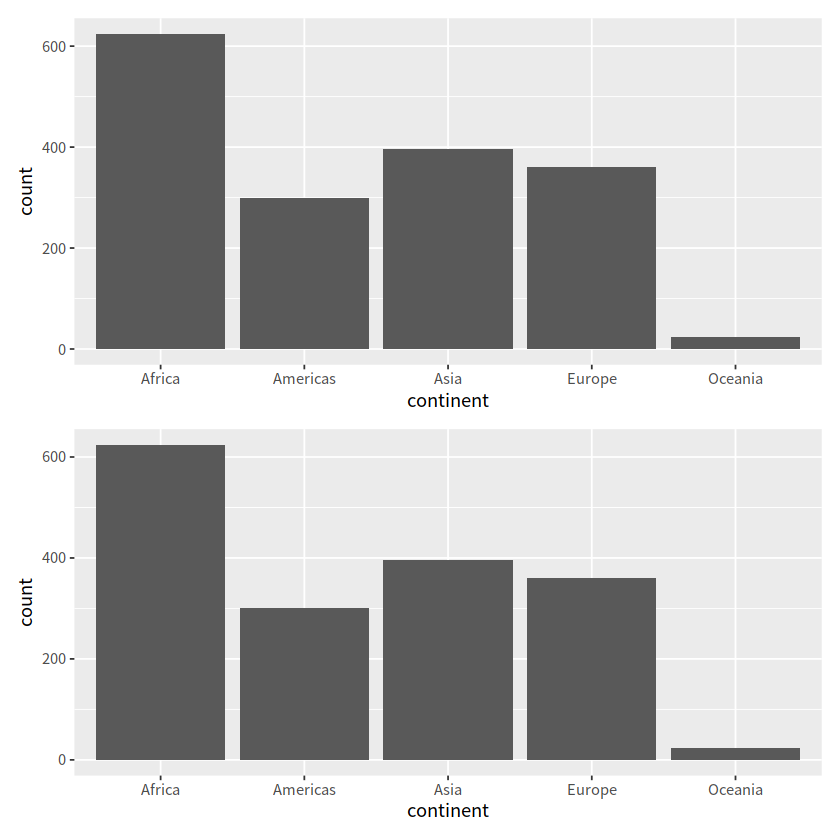

In [22]:
# geom_bar vs stat_count
library(patchwork)
p = gapdata %>% 
  ggplot(aes(x = continent)) + 
  stat_count()

p1 = gapdata %>% 
  ggplot(aes(x = continent)) +
  geom_bar()

p / p1

In [19]:
gapdata %>% count(continent)

continent n  
1 Africa    624
2 Americas  300
3 Asia      396
4 Europe    360
5 Oceania    24

`geom_bar()` 自动完成了对对应行的`count`这个统计

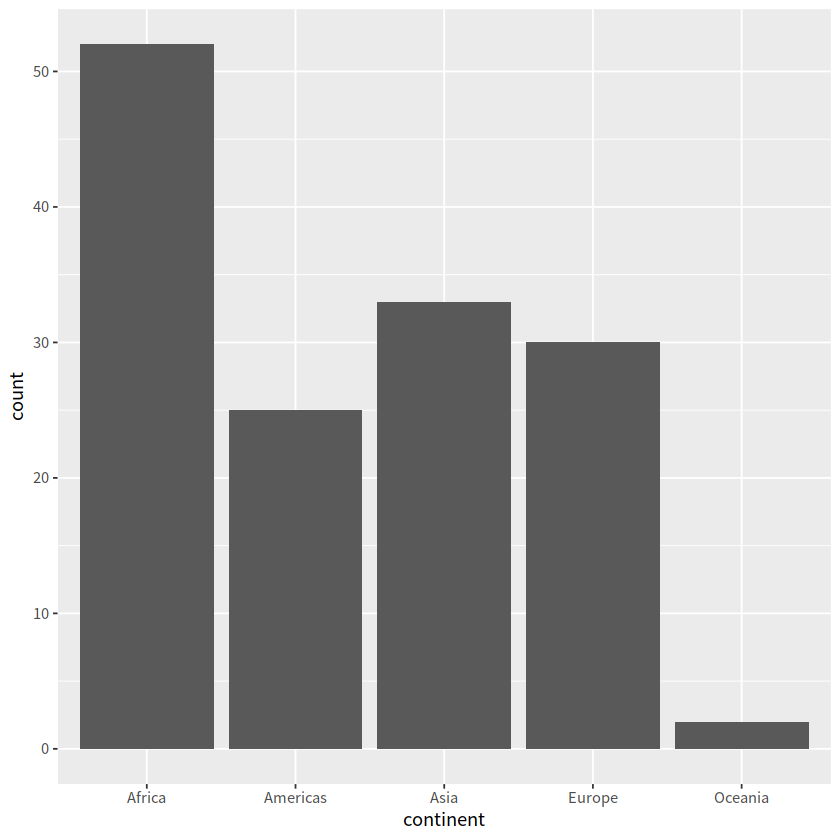

In [23]:
gapdata %>% 
  distinct(continent, country) %>% 
  ggplot(aes(x = continent)) +
  geom_bar()

可先进行统计，再画图，不过显然直接用`geom_bar()`代码更少

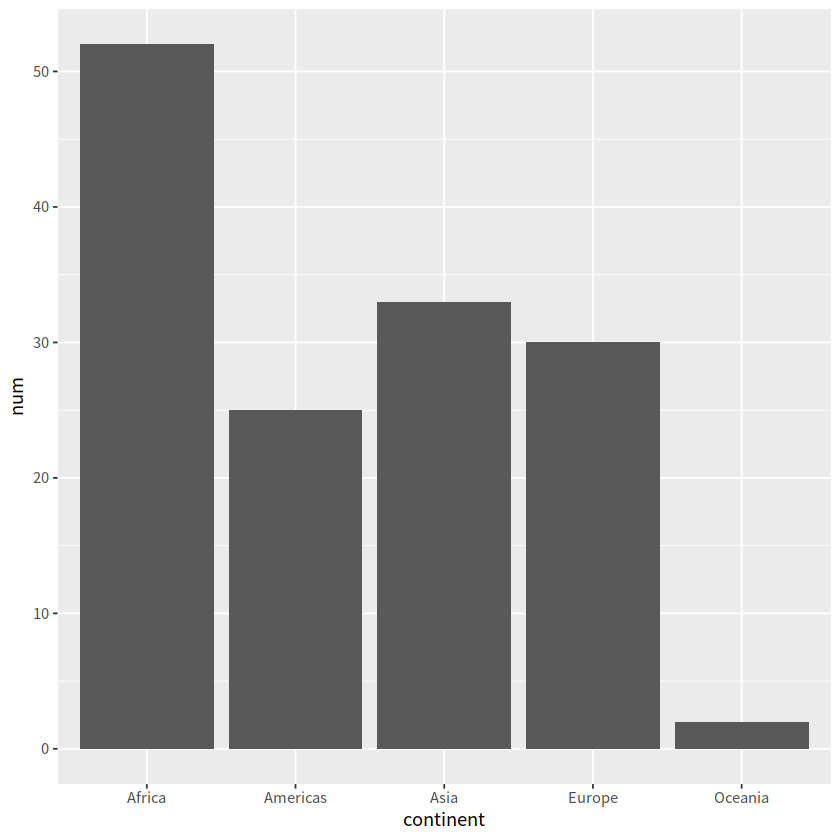

In [26]:
gapdata %>% 
  distinct(continent, country) %>% 
  group_by(continent) %>% 
  summarise(num = n()) %>% 
  ggplot(aes(x = continent, y = num)) +
  geom_col()

### 2 直方图
常用于一个连续变量

`geom_histograms()`, 默认使用 `position = "stack"`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


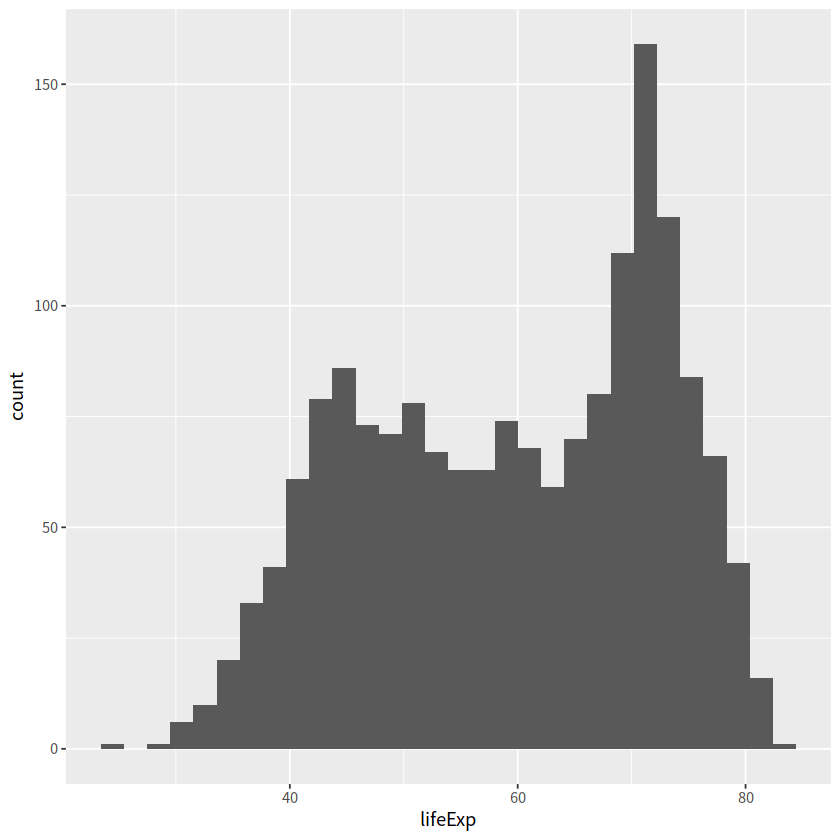

In [27]:
gapdata %>% 
  ggplot(aes(x = lifeExp)) +
  geom_histogram() # corresponding to stat_bin()

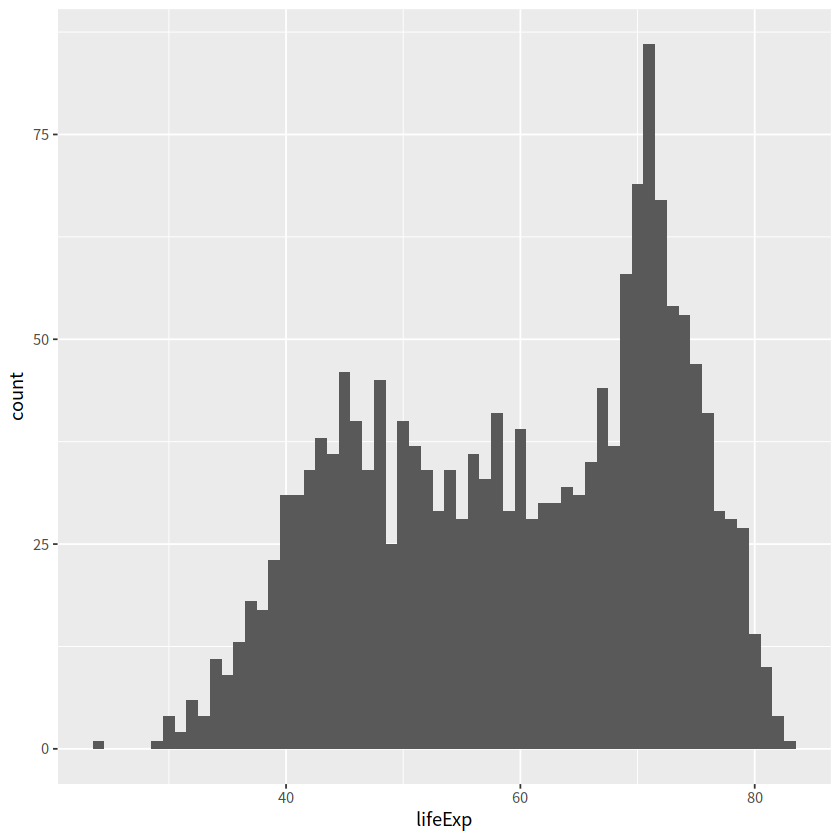

In [28]:
gapdata %>% 
  ggplot(aes(x = lifeExp)) +
  geom_histogram(binwidth = 1)

`geom_histograms()`, 默认使用 `position = "stack"`



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


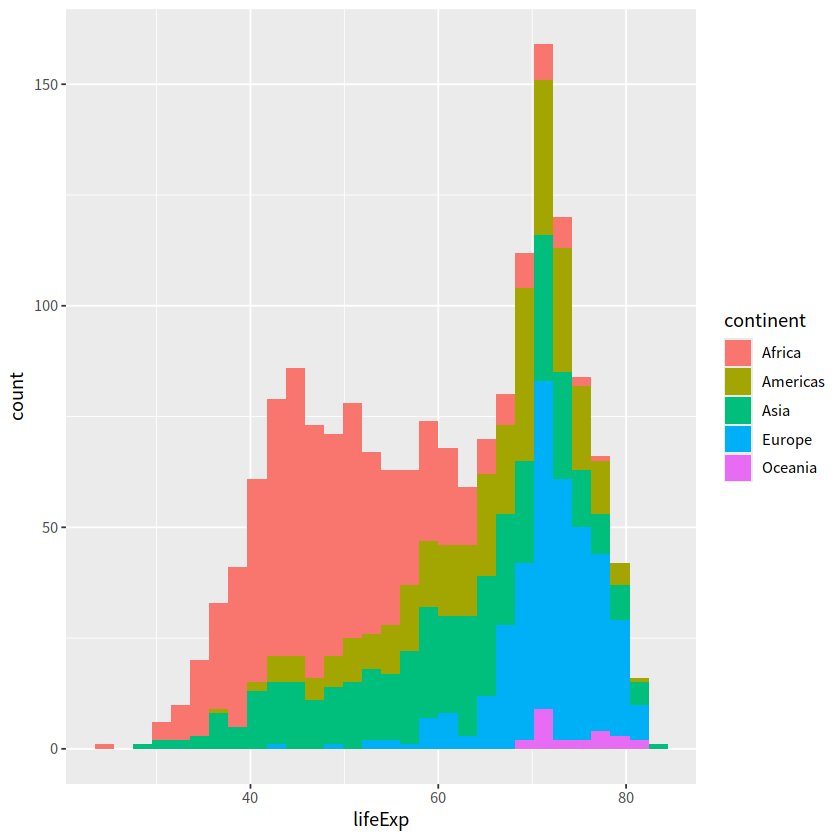

In [29]:
gapdata %>% 
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_histogram()

也可以指定 `position = "identity"`

参数的含义是指直方图的条形应当以其实际计数（频数）堆叠在一起，而不进行任何调整

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


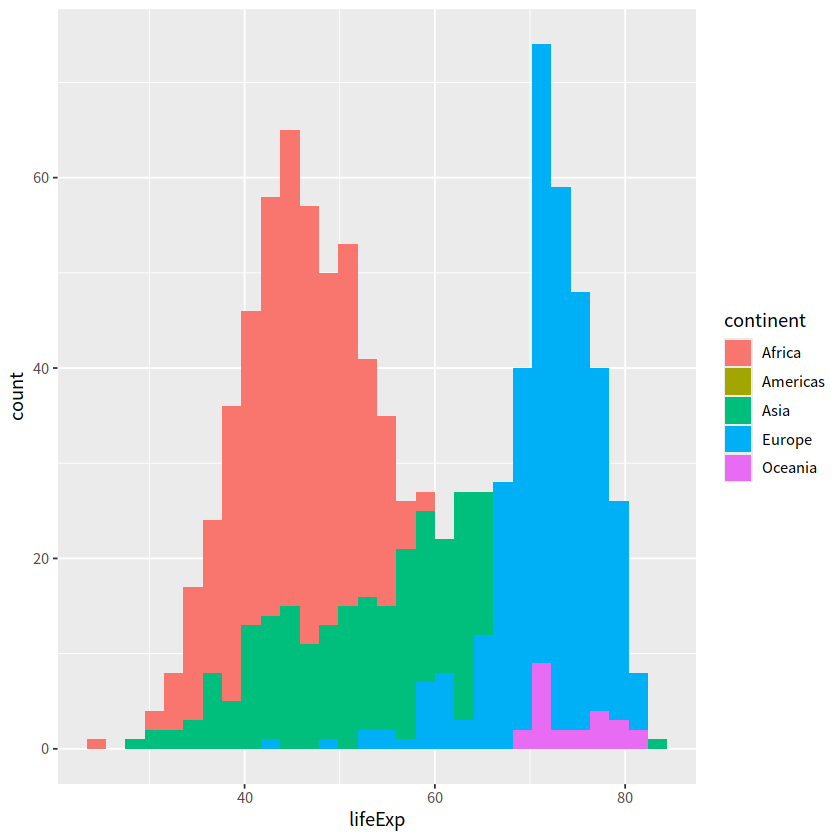

In [31]:
gapdata %>% 
  ggplot(aes(x = lifeExp, fill = continent)) + 
  geom_histogram(position = "identity")

### 3 频次图
`geom_freqpoly()`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


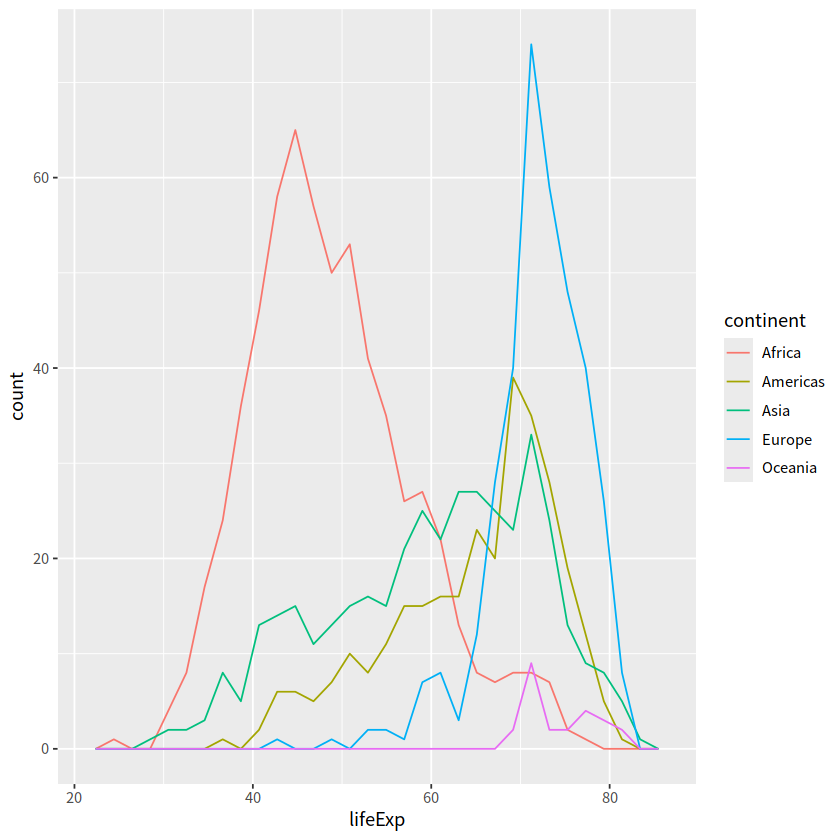

In [32]:
gapdata %>% 
  ggplot(aes(x = lifeExp, color = continent)) +
  geom_freqpoly()

### 4 密度图
`geom_density()`
- `geom_density()` 中`adjust` 用于调节`bandwidth`, `adjust = 1/2` means use half of the default bandwidth.

`geom_line(stat = "density")`

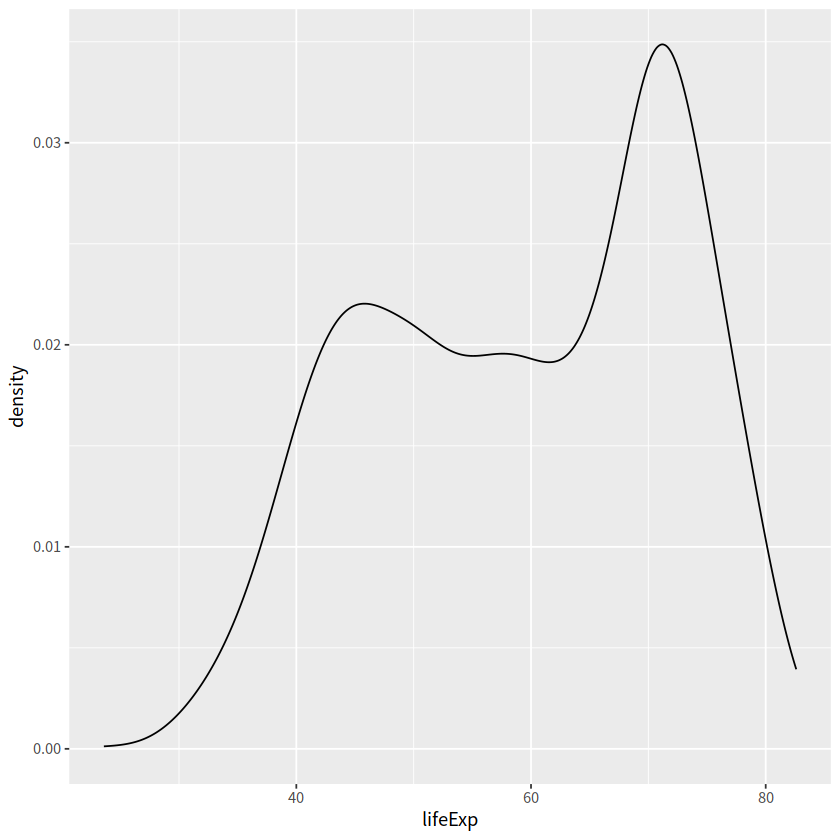

In [33]:
#' smooth histogram = density plot
gapdata %>% 
  ggplot(aes(x = lifeExp)) +
  geom_density()

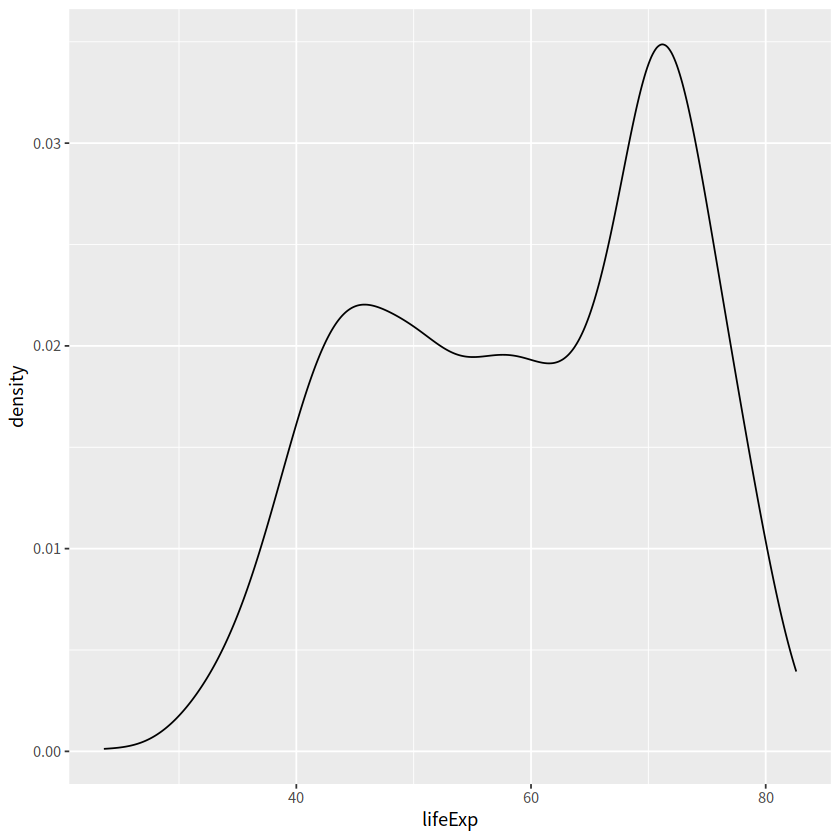

In [34]:
gapdata %>% 
  ggplot(aes(x = lifeExp)) +
  geom_line(stat = "density")

`adjust` 用于调节`bandwidth`, `adjust = 1/2`means use half of the default bandwidth.

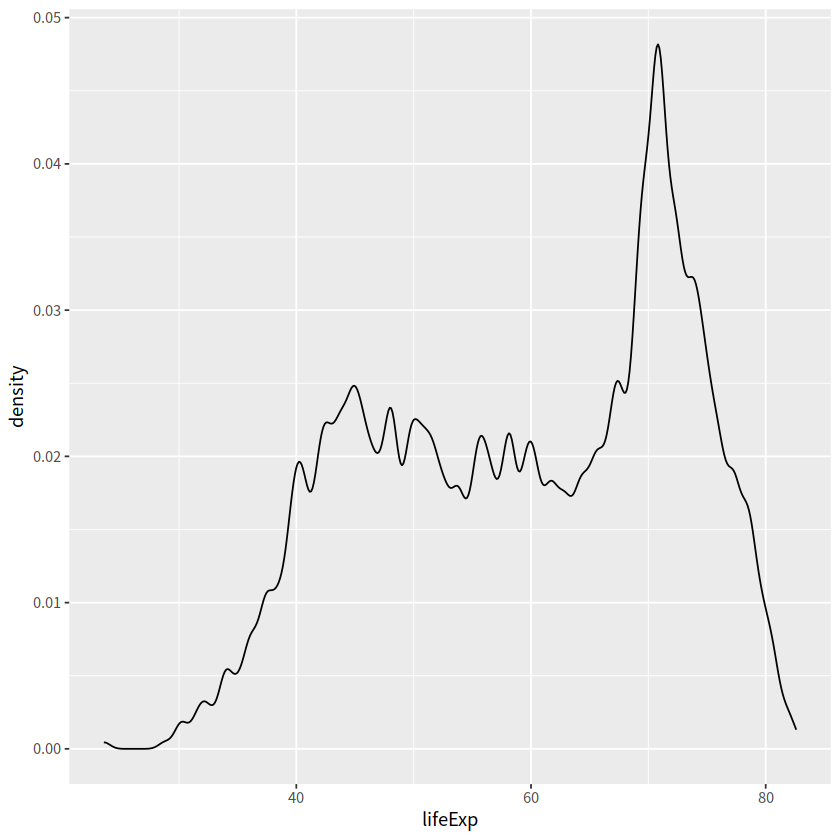

In [38]:
gapdata %>% 
  ggplot(aes(x = lifeExp)) +
  geom_density(adjust = 0.2)

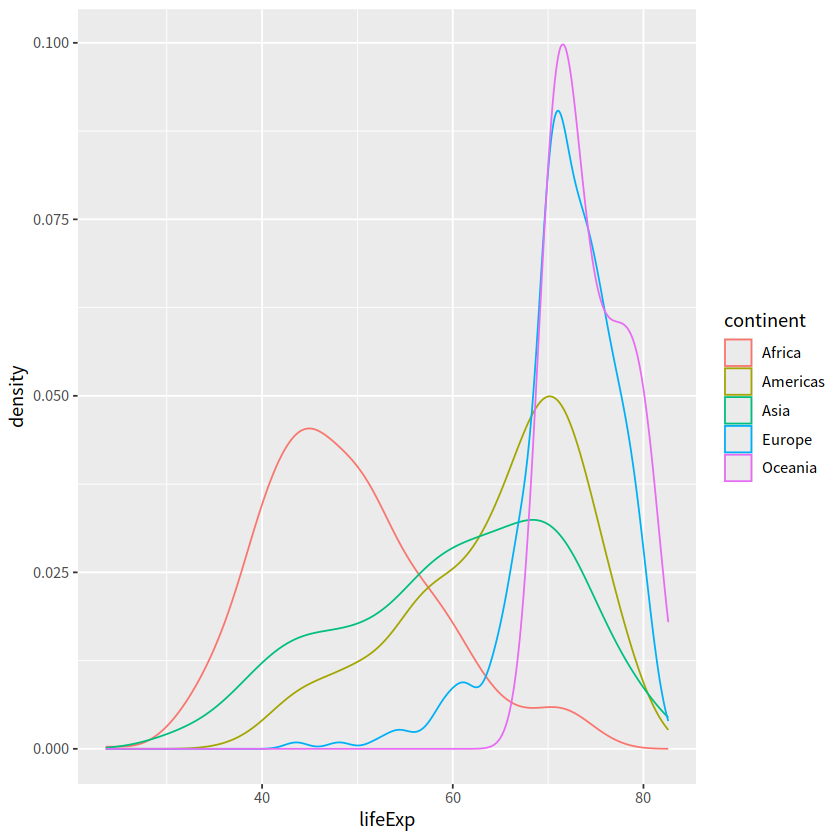

In [39]:
gapdata %>% 
  ggplot(aes(x = lifeExp, color = continent)) +
  geom_density()

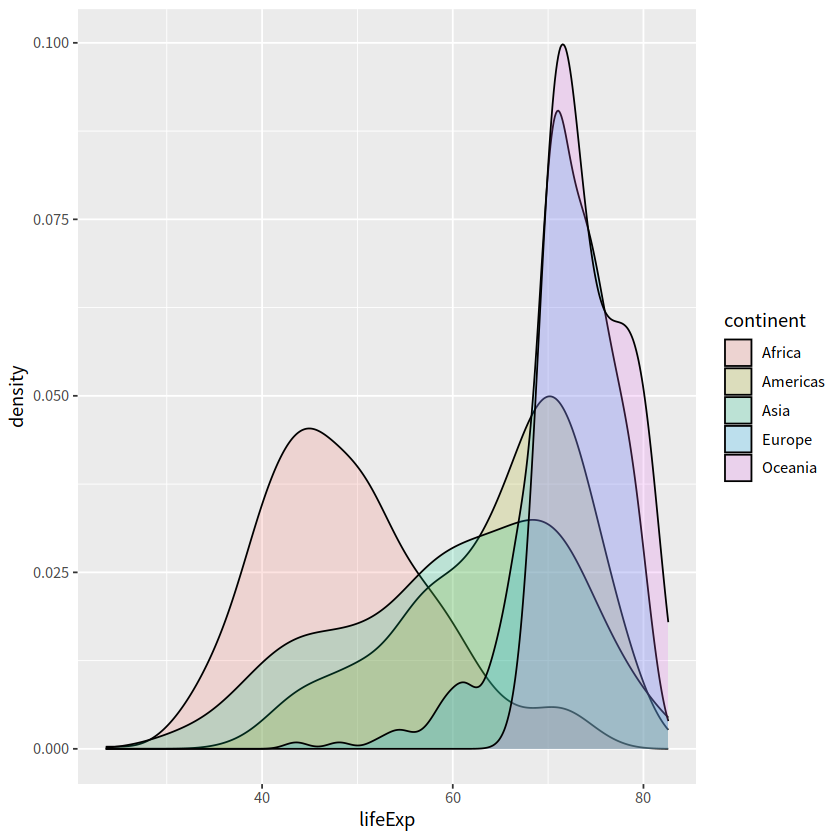

In [40]:
gapdata %>% 
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.2)

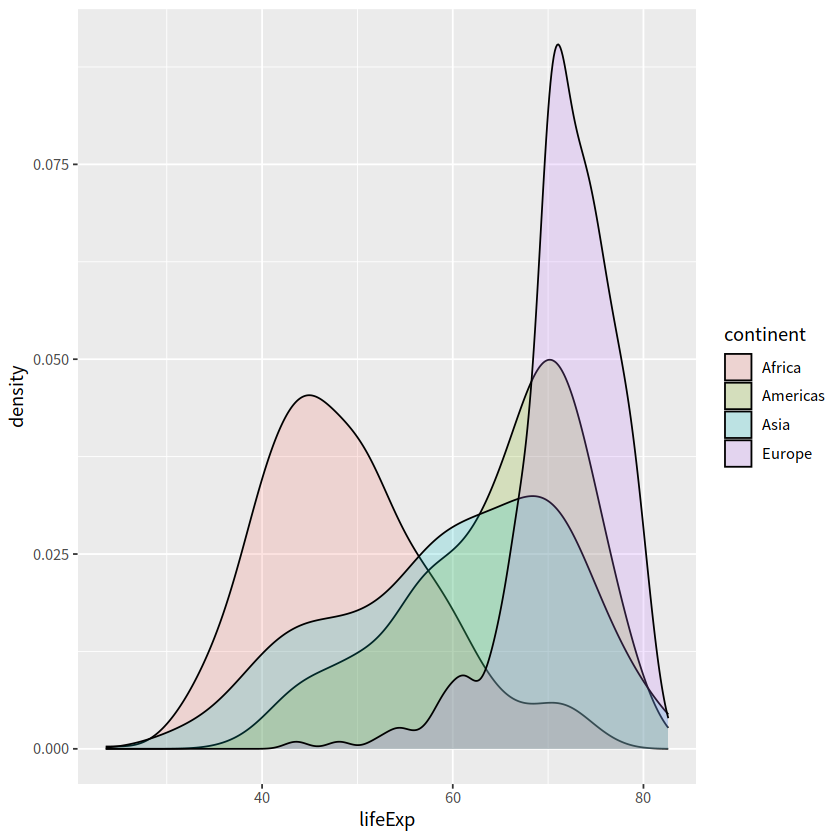

In [41]:
gapdata %>% 
  filter(continent != "Oceania") %>% 
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.2)

直方图和密度图画在一起。注意`y = stat(density)`表示`y`是由`x`新生成的变量，这是一种固定写法，类似的还有`stat(count)`, `stat(level)`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


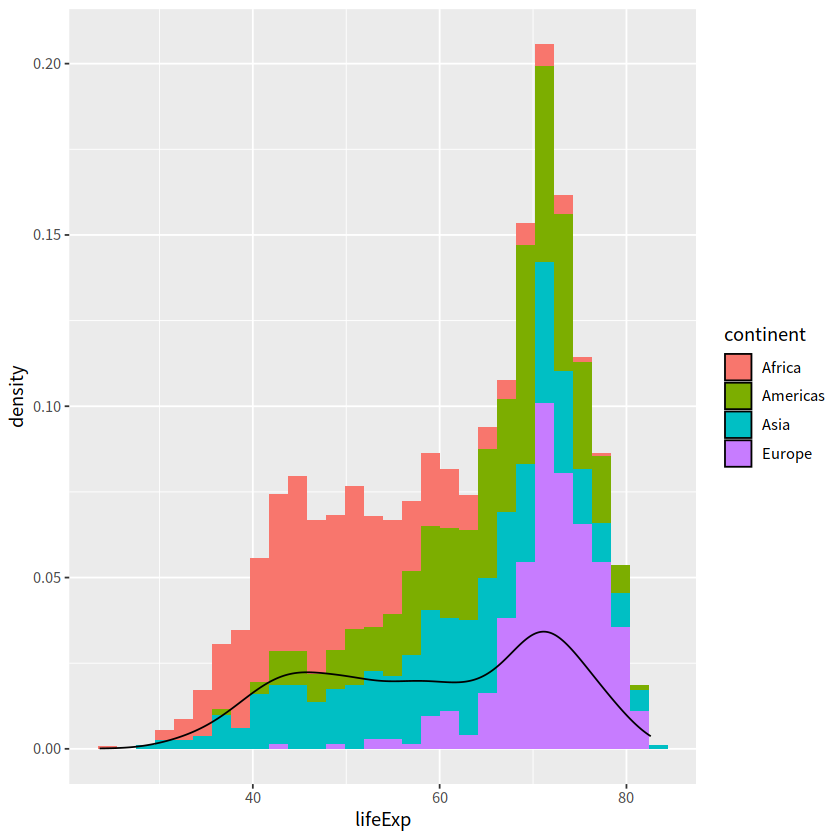

In [44]:
gapdata %>% 
  filter(continent != "Oceania") %>% 
  ggplot(aes(x = lifeExp, y = stat(density))) +
  geom_histogram(aes(fill = continent)) +
  geom_density()

### 5 箱线图
一个离散变量 + 一个连续变量

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


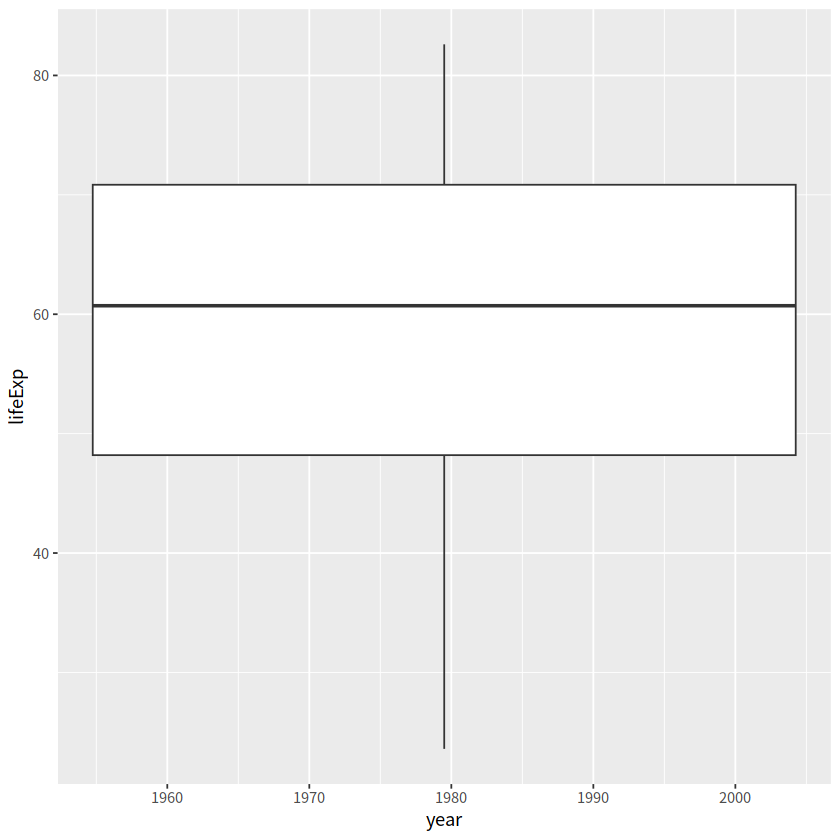

In [45]:
gapdata %>% 
  ggplot(aes(x = year, y = lifeExp)) +
  geom_boxplot()

数据框中的`year`变量是数值型，需要先转换成因子型，弄成离散型变量

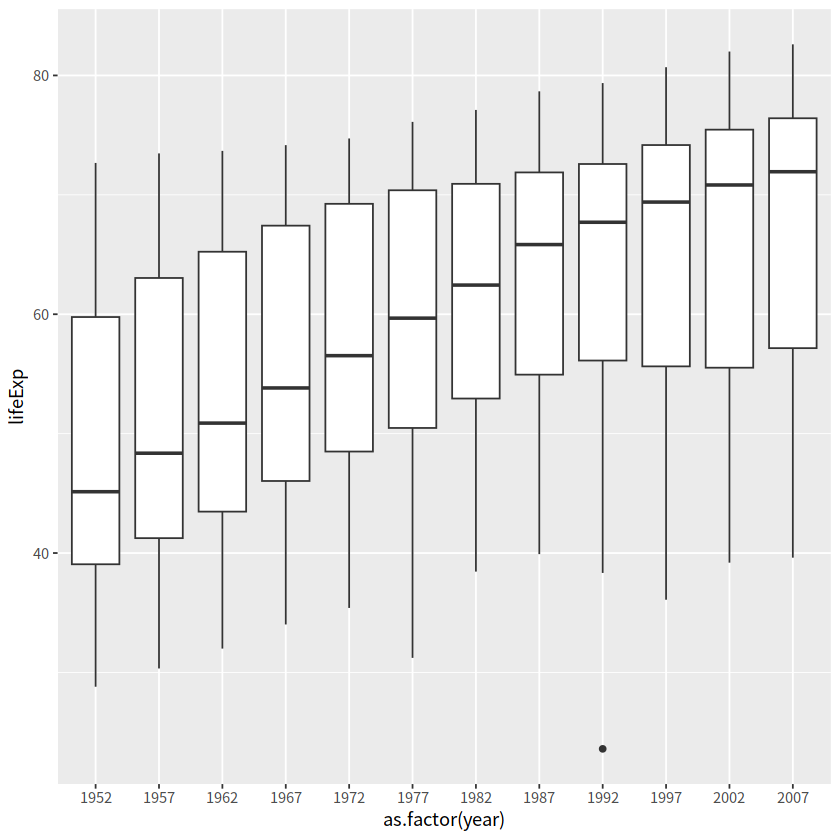

In [46]:
gapdata %>% 
  ggplot(aes(x = as.factor(year), y = lifeExp)) +
  geom_boxplot()

当然，也可以用`group`明确指定分组变量

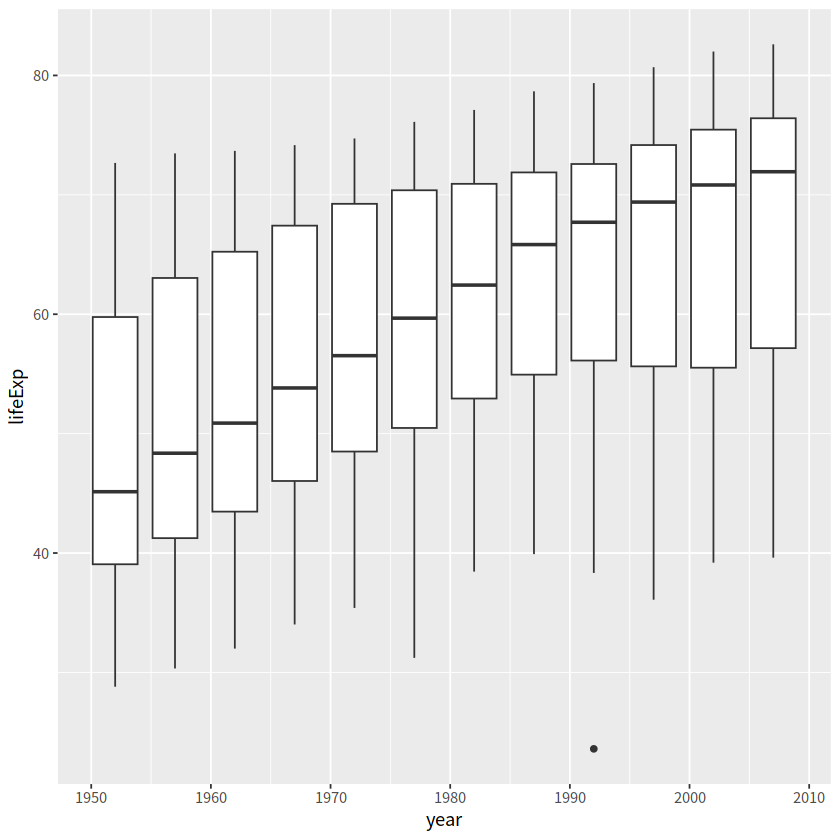

In [47]:
gapdata %>% 
  ggplot(aes(x = year, y = lifeExp)) +
  geom_boxplot(aes(group = year))

小提琴图+散点+光滑曲线

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


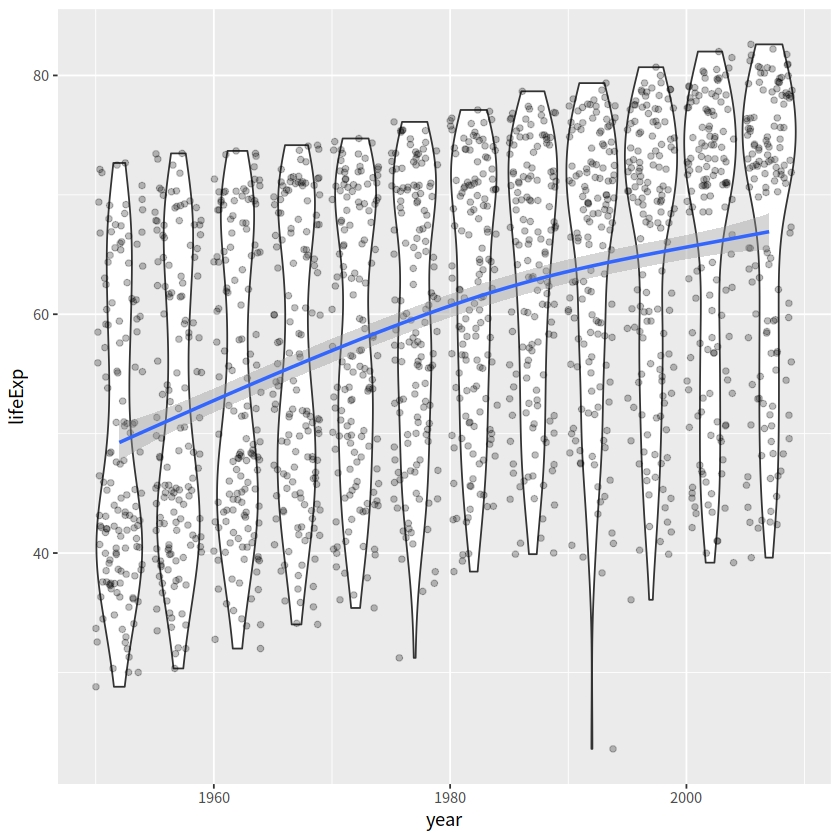

In [49]:
gapdata %>% 
  ggplot(aes(x = year, y = lifeExp))+
  geom_violin(aes(group = year))+
  geom_jitter(alpha = 0.25)+
  geom_smooth(se = TRUE)

### 6 抖动散点图
点重叠的处理方案

`geom_jitter()`

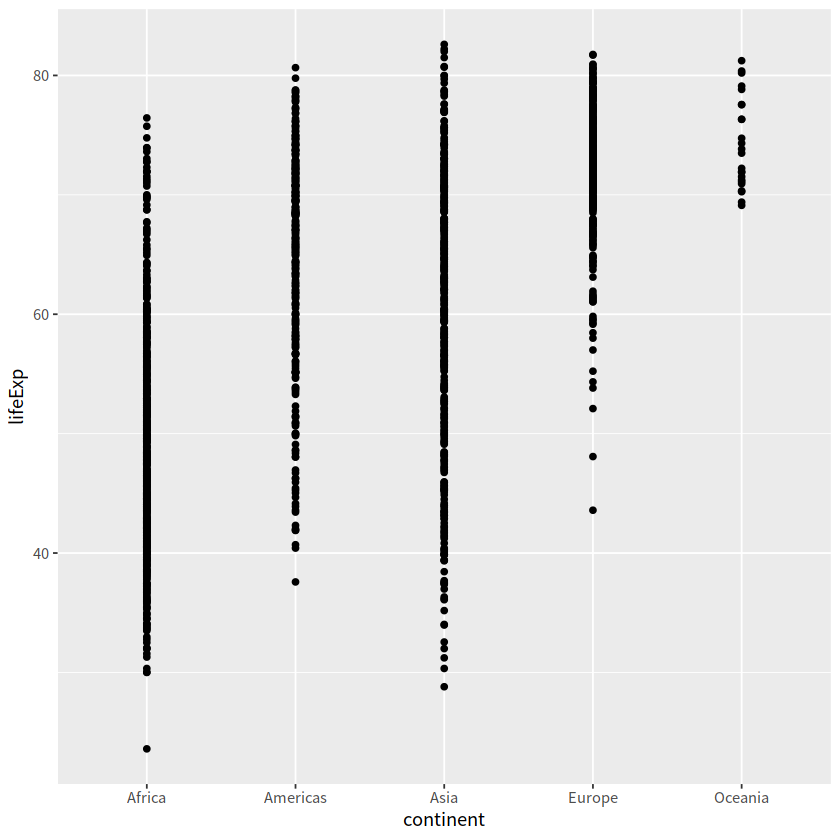

In [52]:
gapdata %>% 
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_point()

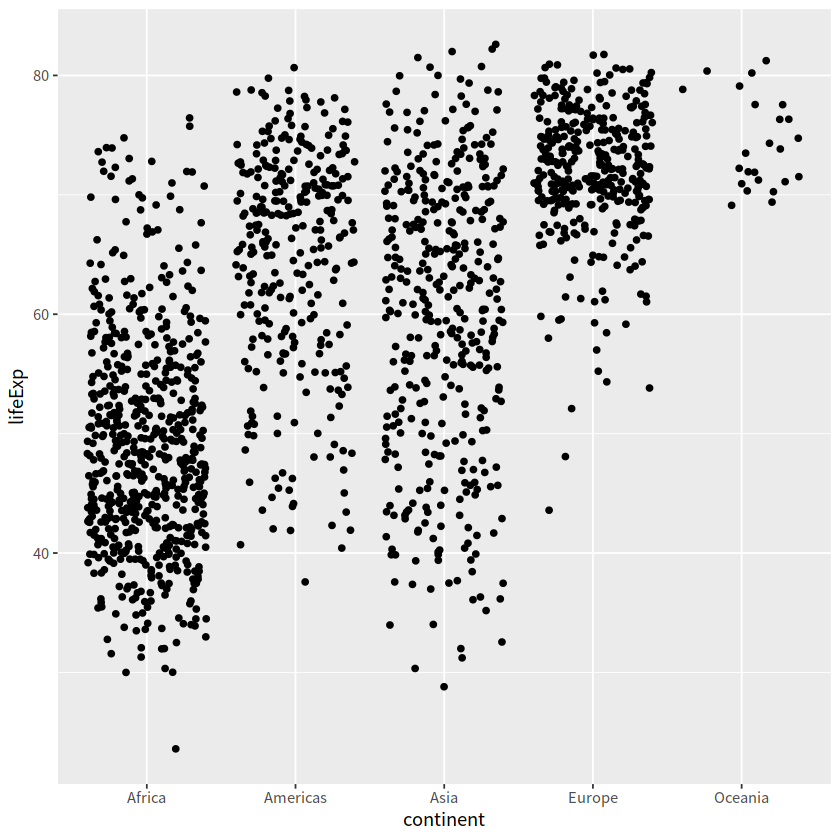

In [53]:
gapdata %>% 
  ggplot(aes(x = continent, y = lifeExp))+
  geom_jitter()

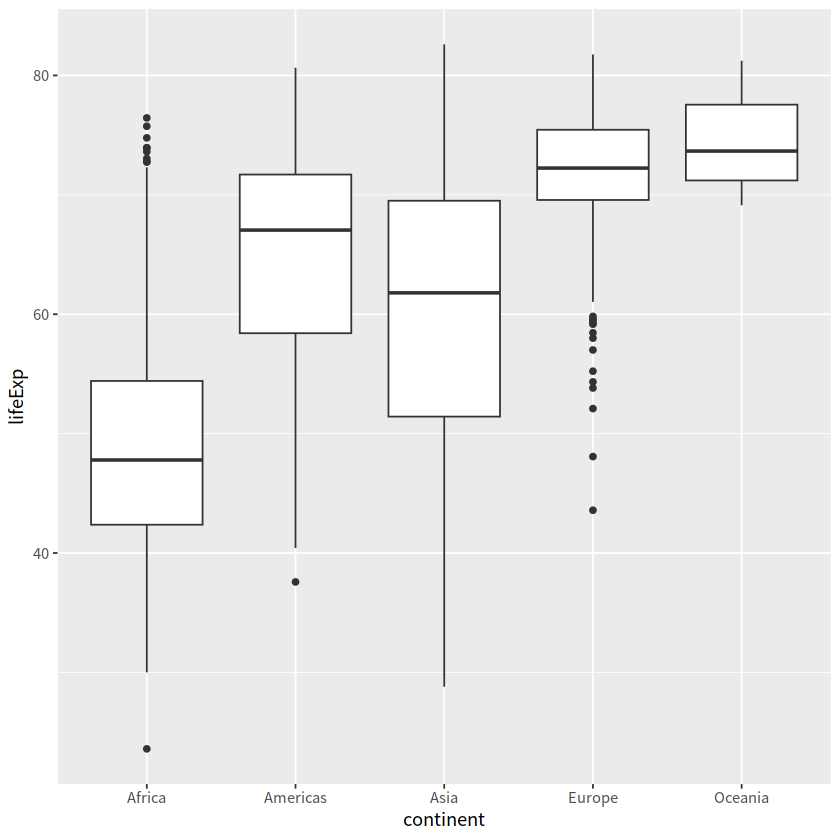

In [54]:
gapdata %>% 
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

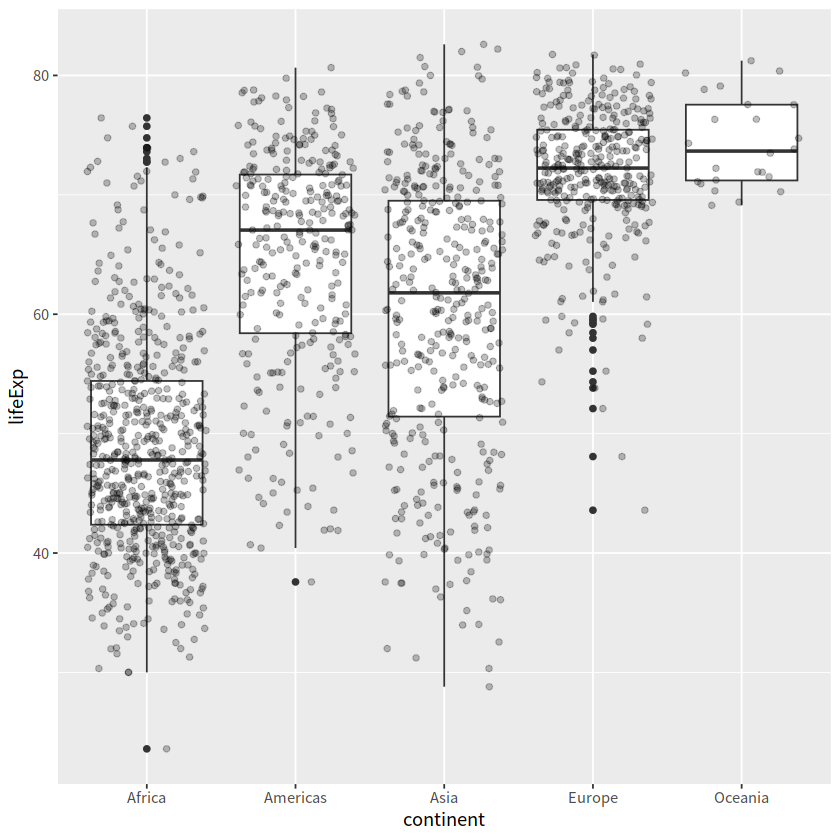

In [57]:
gapdata %>% 
  ggplot(aes(x = continent, y = lifeExp))+
  geom_boxplot()+
  geom_jitter(alpha = 0.25)

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


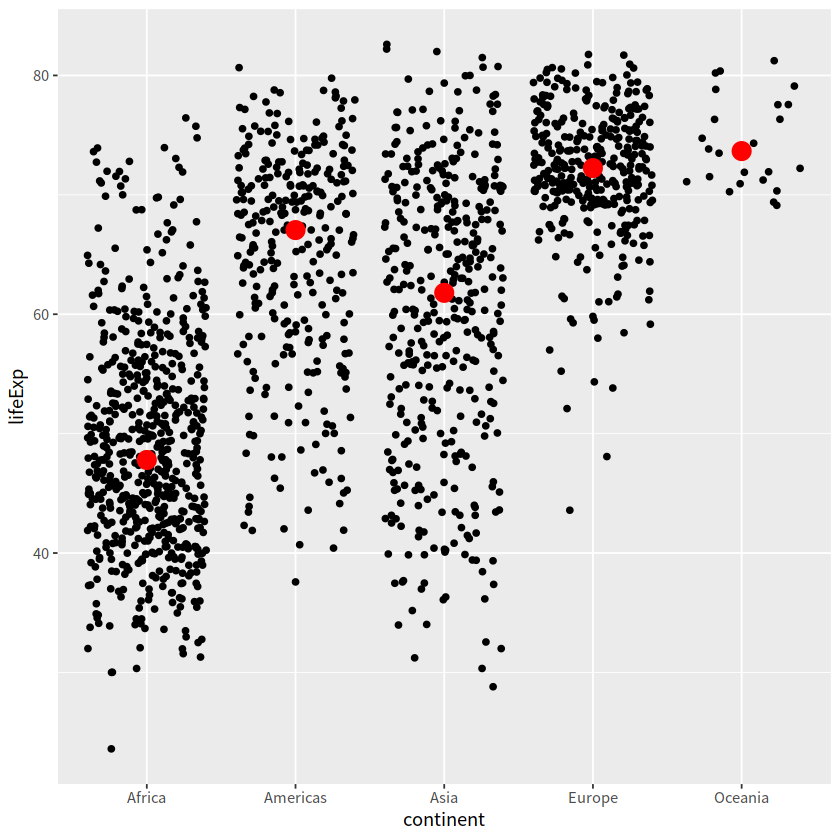

In [58]:
gapdata %>% 
  ggplot(aes(x = continent, y = lifeExp))+
  geom_jitter()+
  stat_summary(fun.y = median, colour = "red", geom = "point", size = 5)

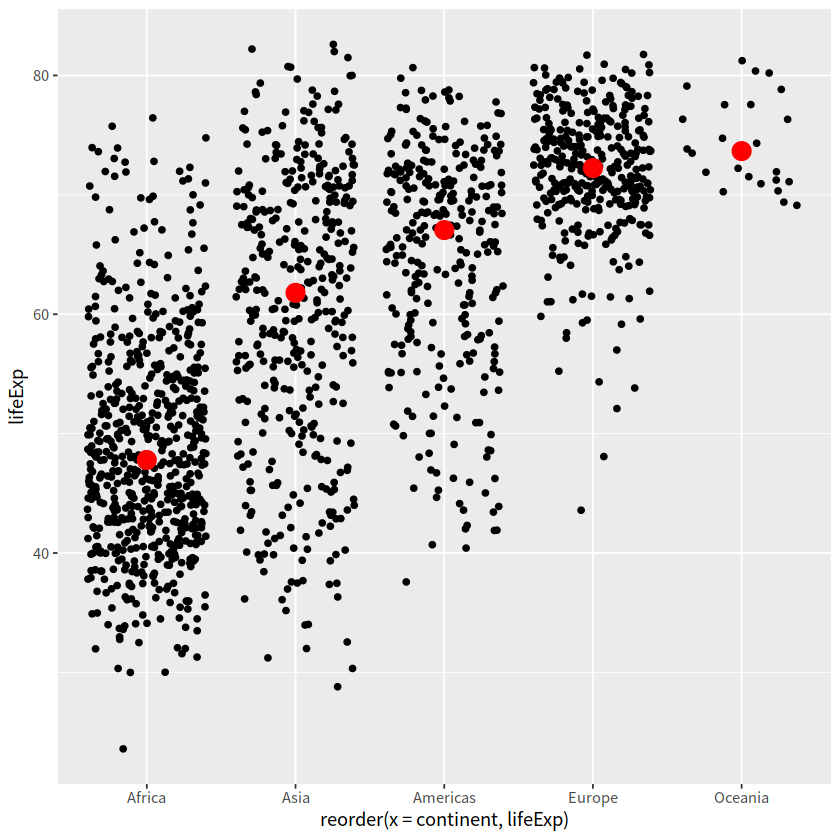

In [60]:
gapdata %>%
  ggplot(aes(reorder(x = continent, lifeExp), y = lifeExp)) +
  geom_jitter() +
  stat_summary(fun.y = median, colour = "red", geom = "point", size = 5)

注意到我们已经提到过 `stat_count` / `stat_bin` / `stat_summary`

Warning message:
“The `fun.ymin` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.min` argument instead.”
Warning message:
“The `fun.ymax` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.max` argument instead.”


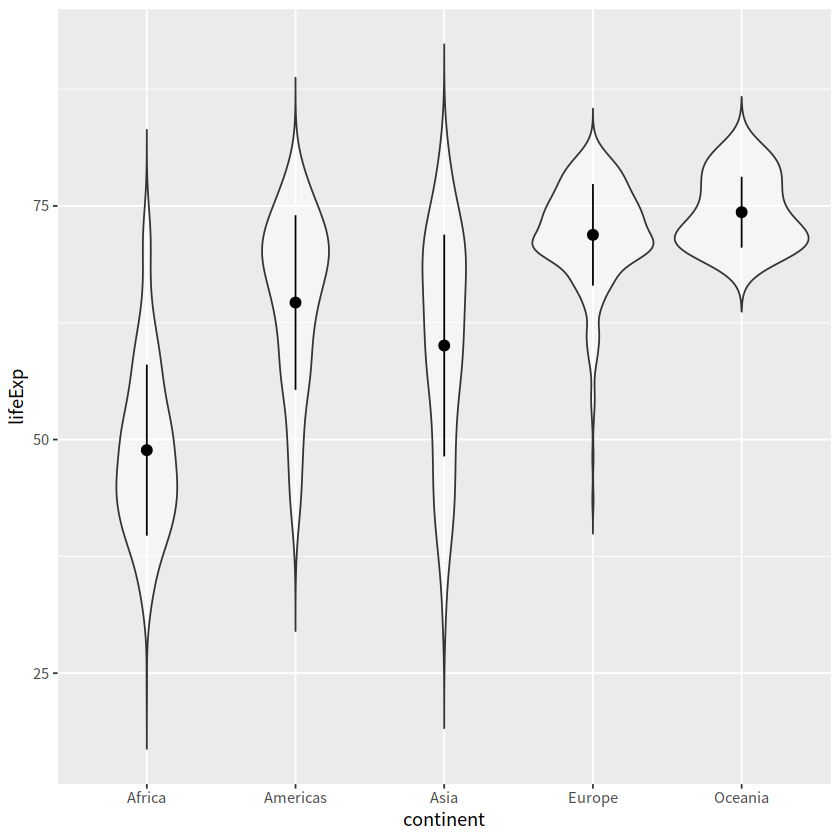

In [62]:
gapdata %>% 
  ggplot(aes(x = continent, y = lifeExp))+
  geom_violin(trim = FALSE, alpha = 0.5) +
  stat_summary(fun.y = mean,
    fun.ymax = function(x){mean(x) + sd(x)},
    fun.ymin = function(x){mean(x) - sd(x)},
    geom = "pointrange")

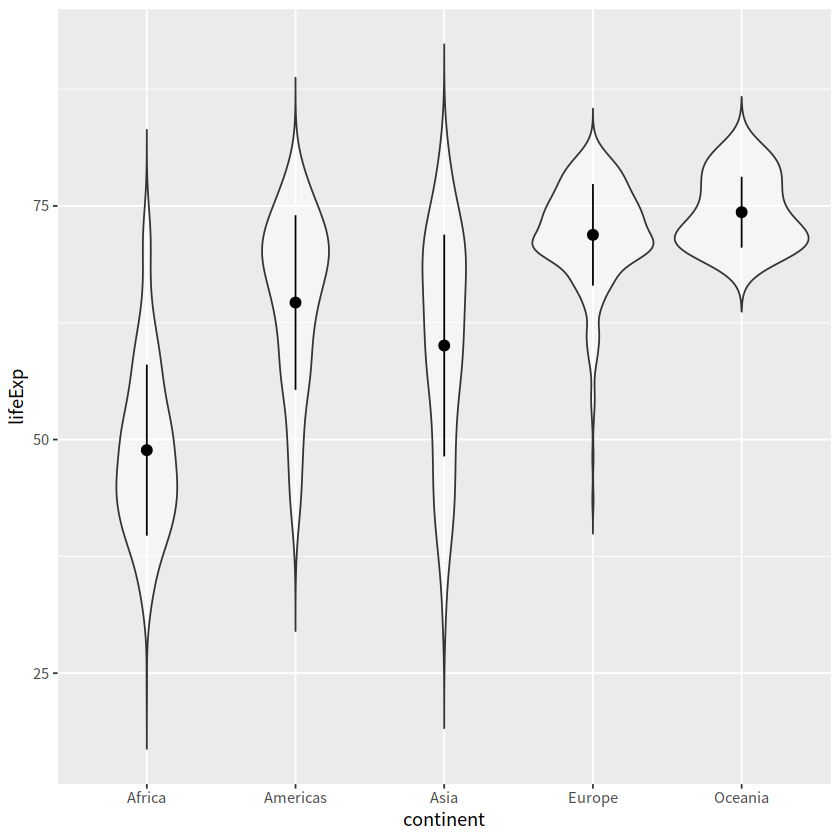

In [71]:
gapdata %>% 
  ggplot(aes(x = continent, y = lifeExp))+
  geom_violin(trim = FALSE, alpha = 0.5) +
  stat_summary(fun.y = mean,
    fun.ymax = ~mean(.x) + sd(.x),
    fun.ymin = ~mean(.x) - sd(.x),
    geom = "pointrange")

### 7 山峦图
常用于一个离散变量 + 一个连续变量

`ggridges::geom_density_ridges()`

Picking joint bandwidth of 2.23



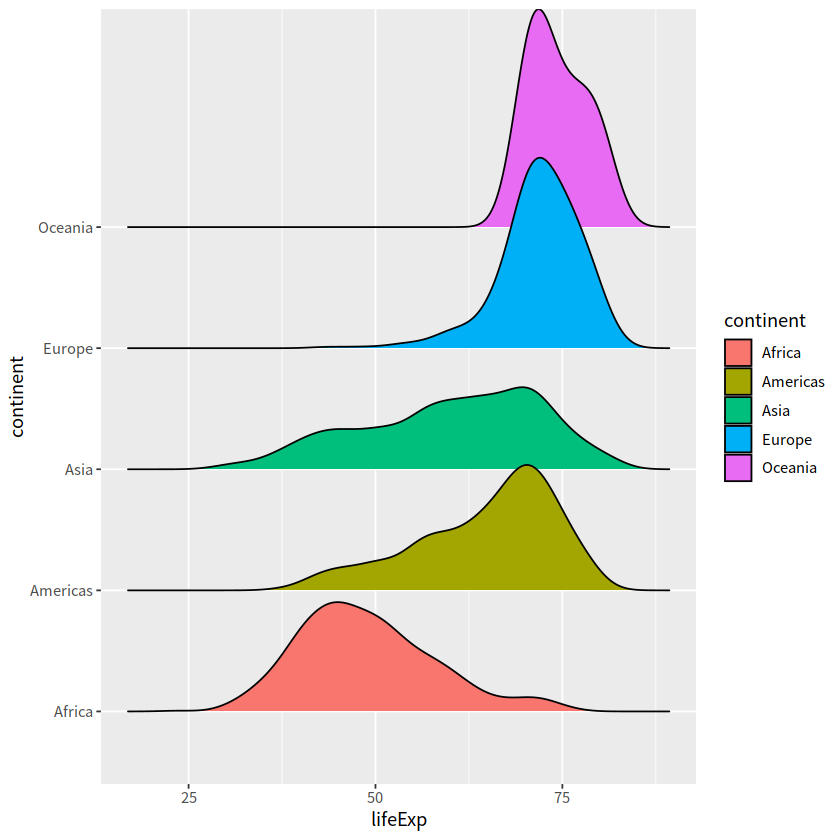

In [72]:
gapdata %>% 
  ggplot(aes(x = lifeExp, y = continent, 
             fill = continent))+
  ggridges::geom_density_ridges()

Picking joint bandwidth of 2.23



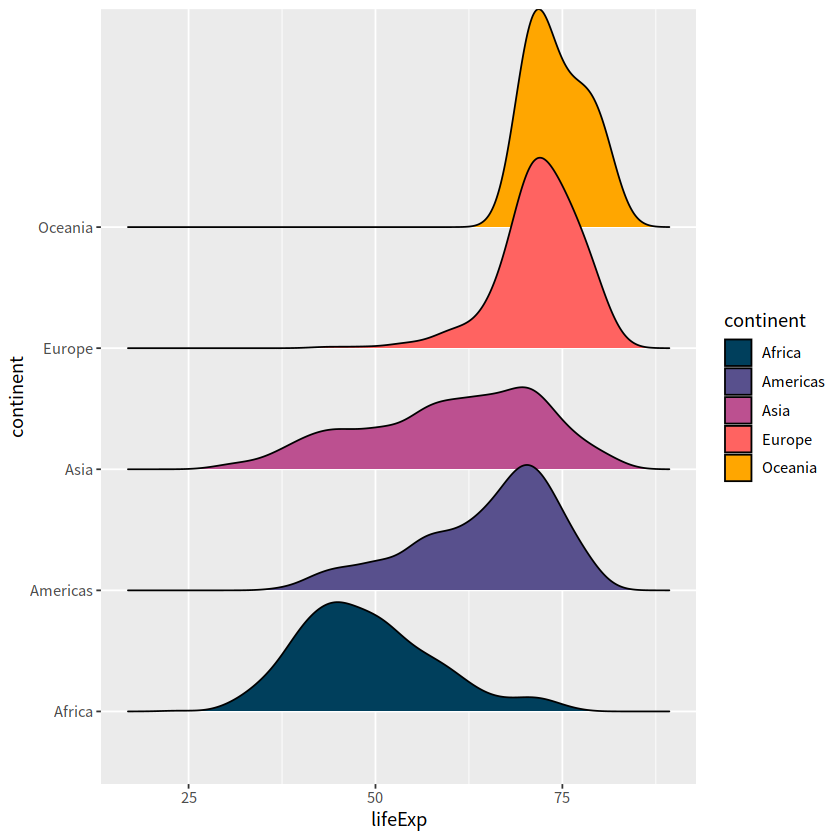

In [73]:
gapdata %>% 
  ggplot(aes(x = lifeExp, y = continent,
            fill = continent))+
  ggridges::geom_density_ridges()+
  scale_fill_manual(
    values = c("#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"))

Picking joint bandwidth of 2.23



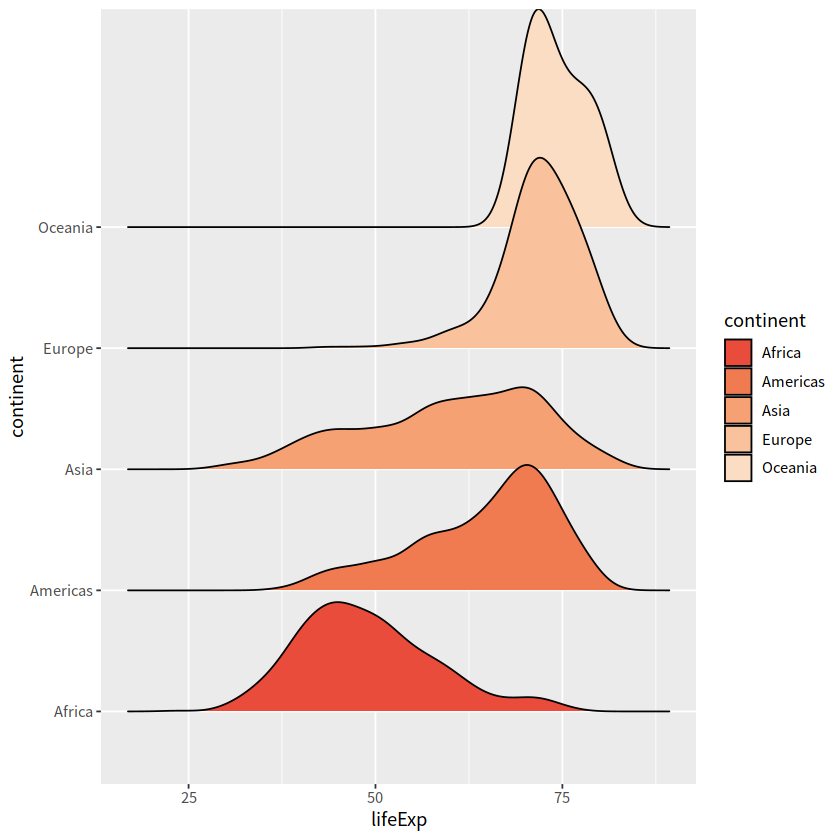

In [74]:
# colorspace 调色板
gapdata %>% 
  ggplot(aes(x = lifeExp, y = continent, 
             fill = continent))+
  ggridges::geom_density_ridges()+
  scale_fill_manual(
    values = colorspace::sequential_hcl(5, palette = "Peach"))

### 散点图
常用于两个连续变量

`geom_point()`

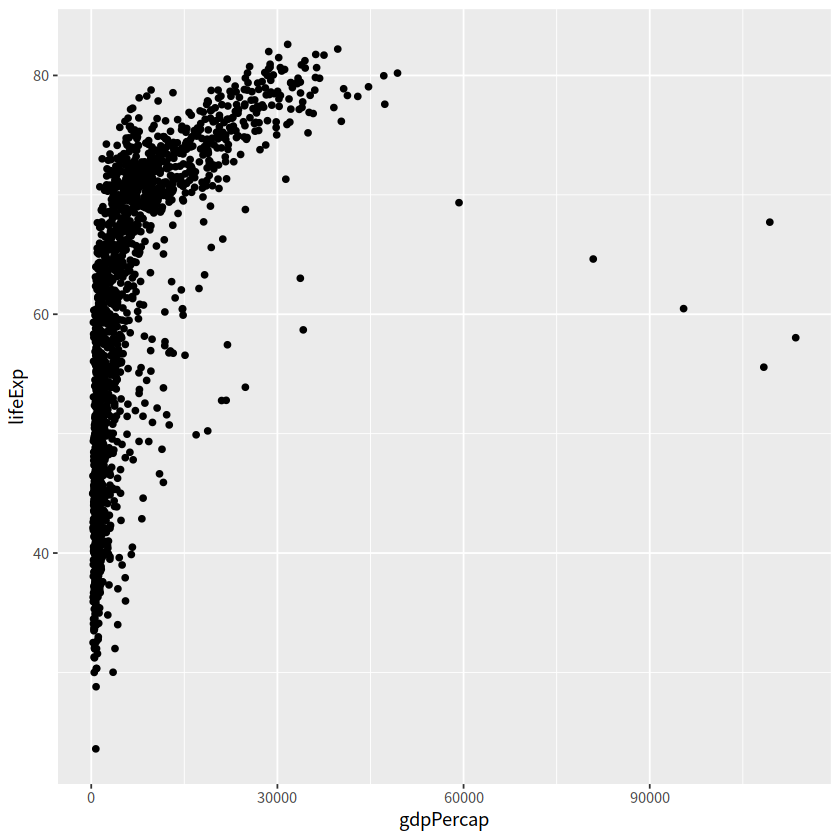

In [75]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point()

更好的 `log` 转化方式
- `scale_x_log10()`
- `scale_y_log10()`

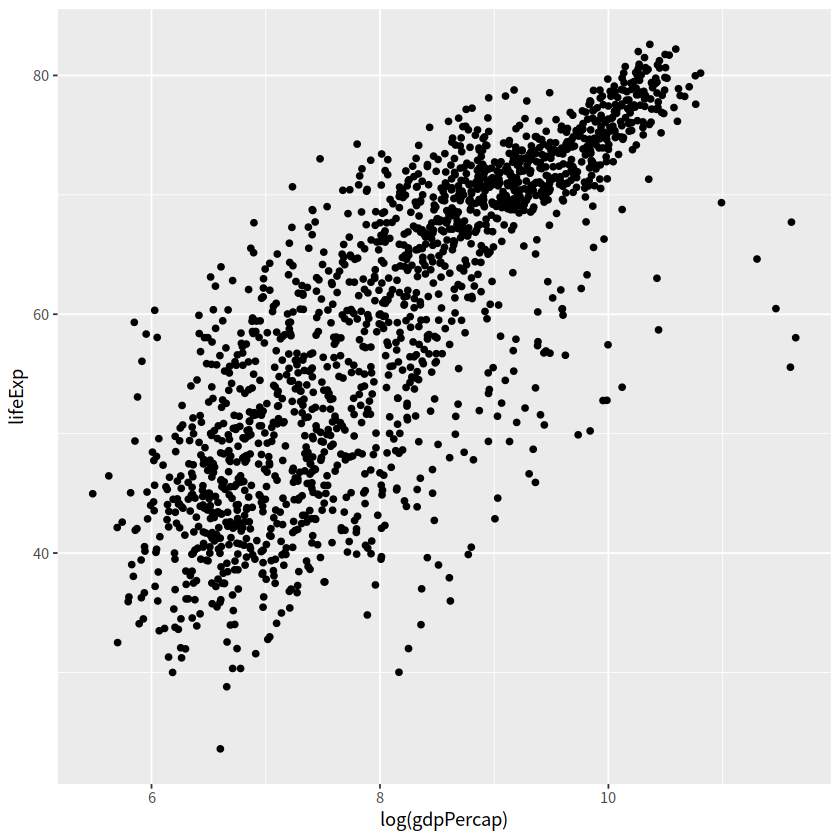

In [76]:
# 一般
gapdata %>% 
  ggplot(aes(x = log(gdpPercap), y = lifeExp))+
  geom_point()

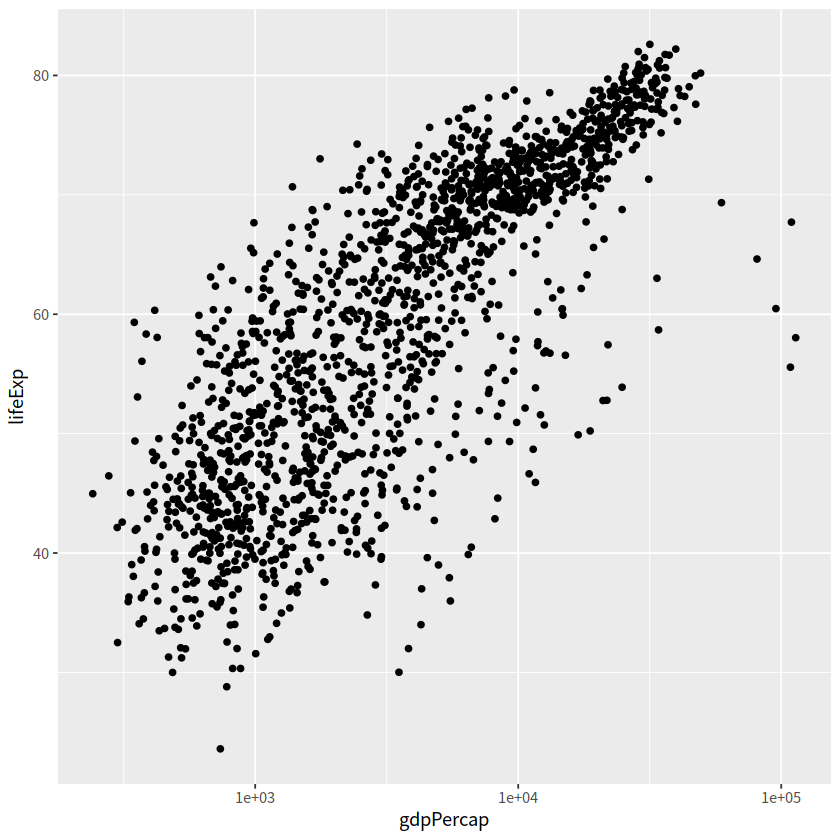

In [79]:
# 更好方式
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp)) +
  geom_point()+
  scale_x_log10()

In [81]:
着色方式

ERROR: Error in eval(expr, envir, enclos): 找不到对象'着色方式'


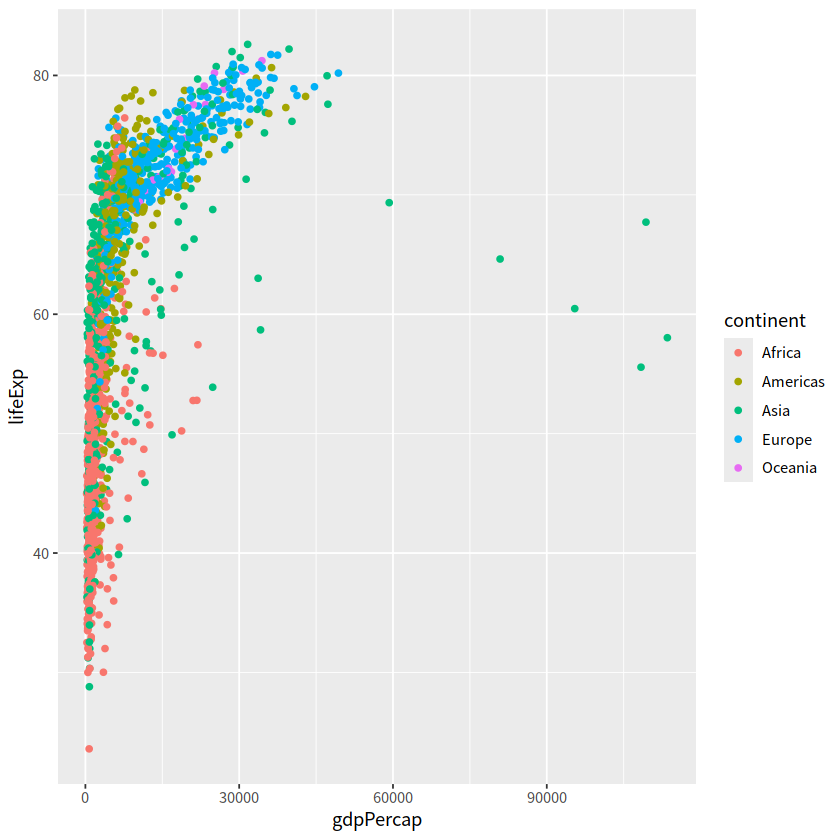

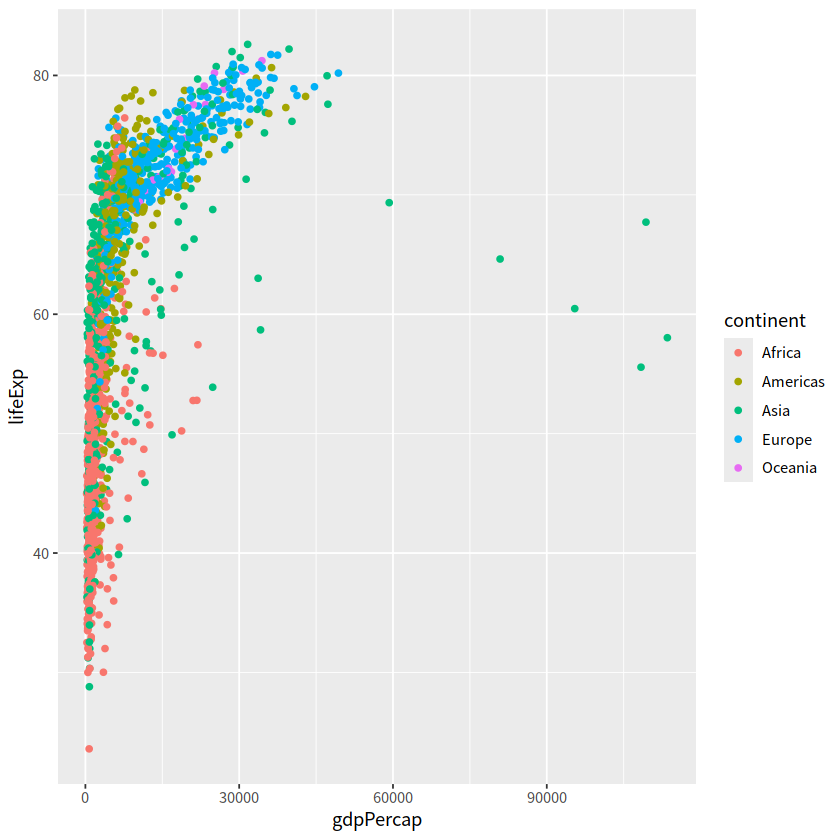

In [84]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point(aes(color = continent))

gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, 
             color = continent))+
  geom_point()

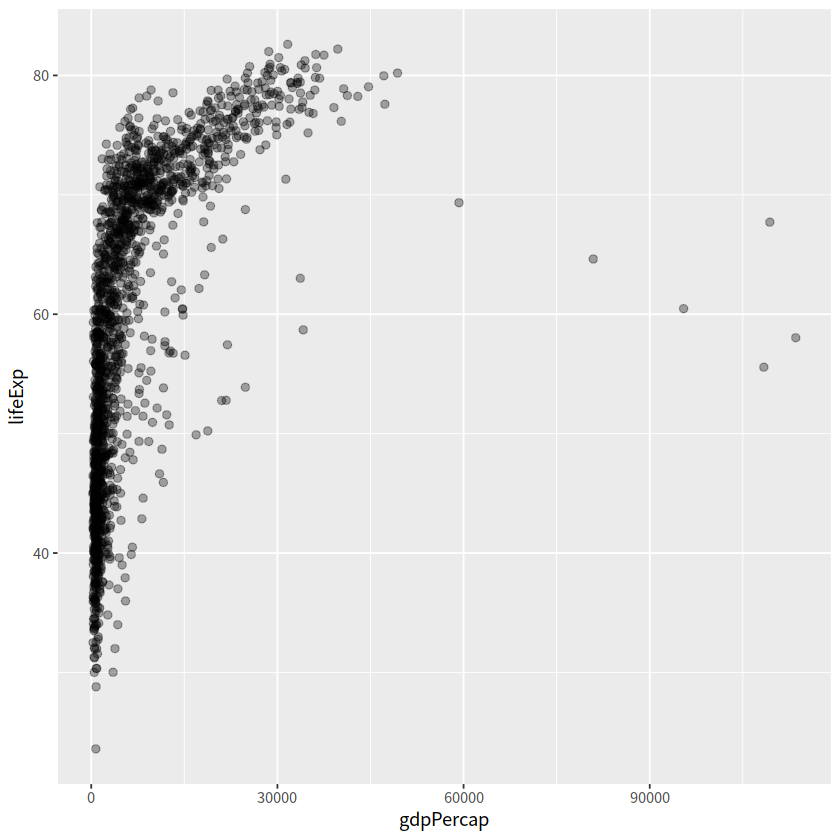

In [85]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point(alpha = (1/3), size = 2)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


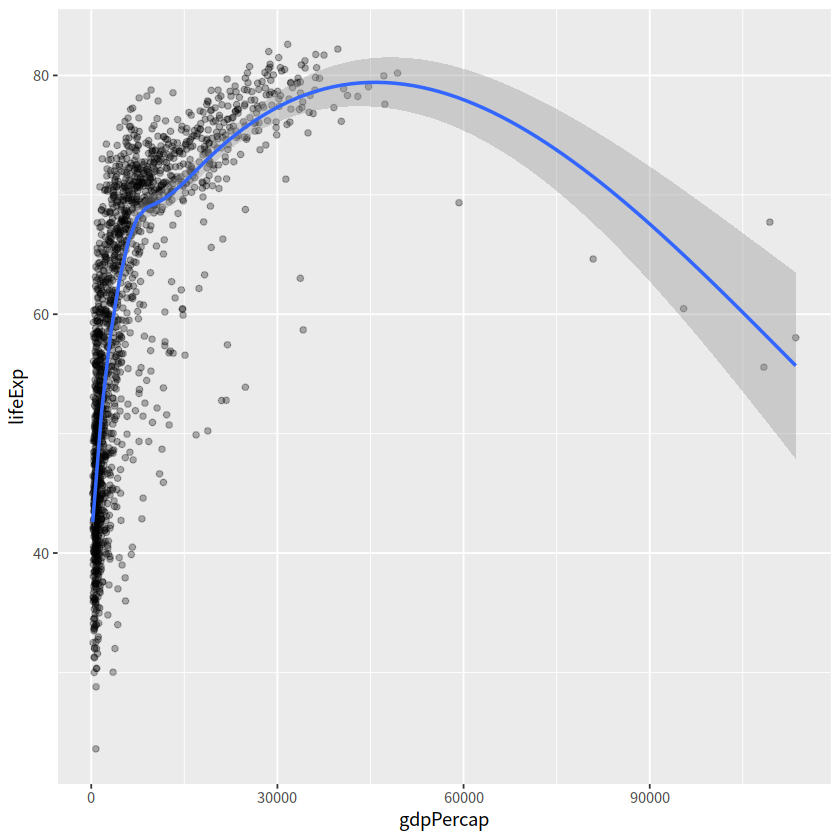

In [87]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point(alpha = 0.3)+
  geom_smooth()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


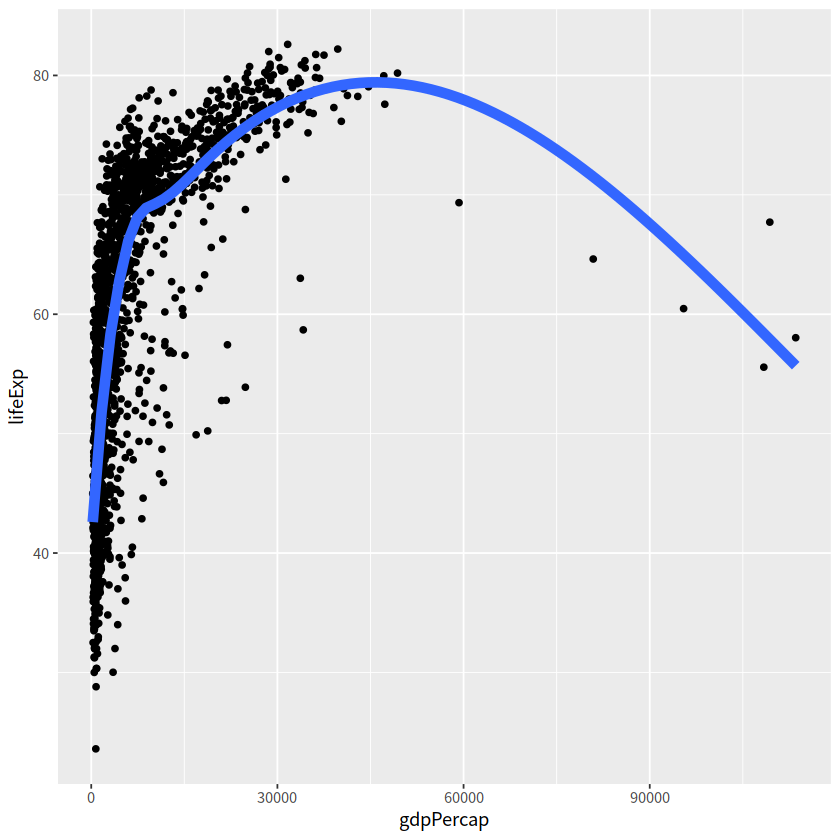

In [90]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point()+
  geom_smooth(lwd = 3, se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


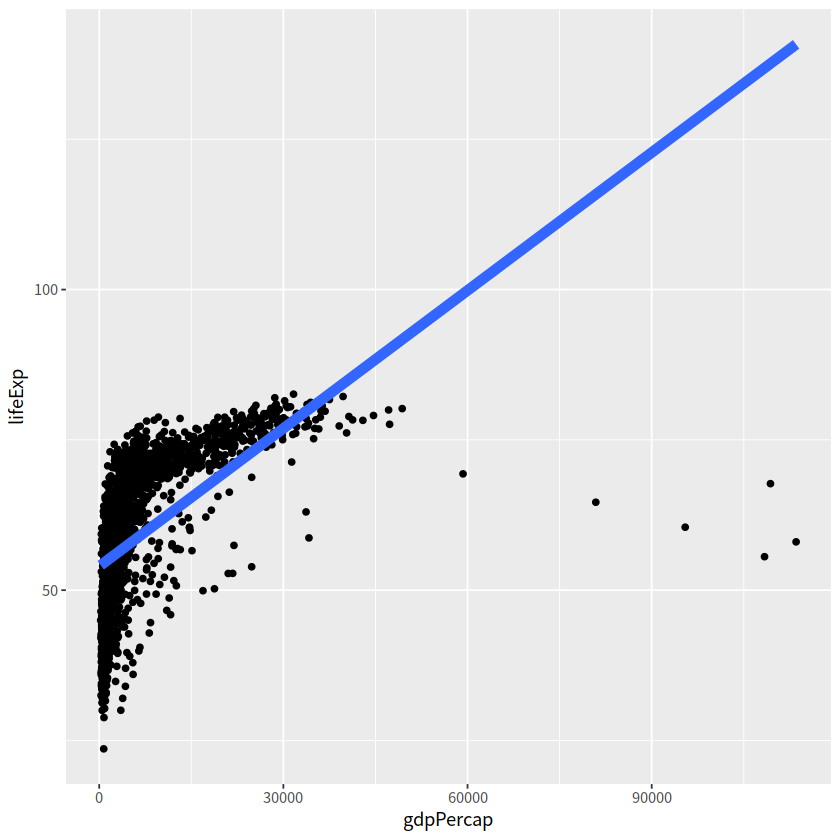

In [91]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point()+
  geom_smooth(lwd = 3, se = FALSE, method = "lm")

`geom_smooth()` using formula = 'y ~ x'


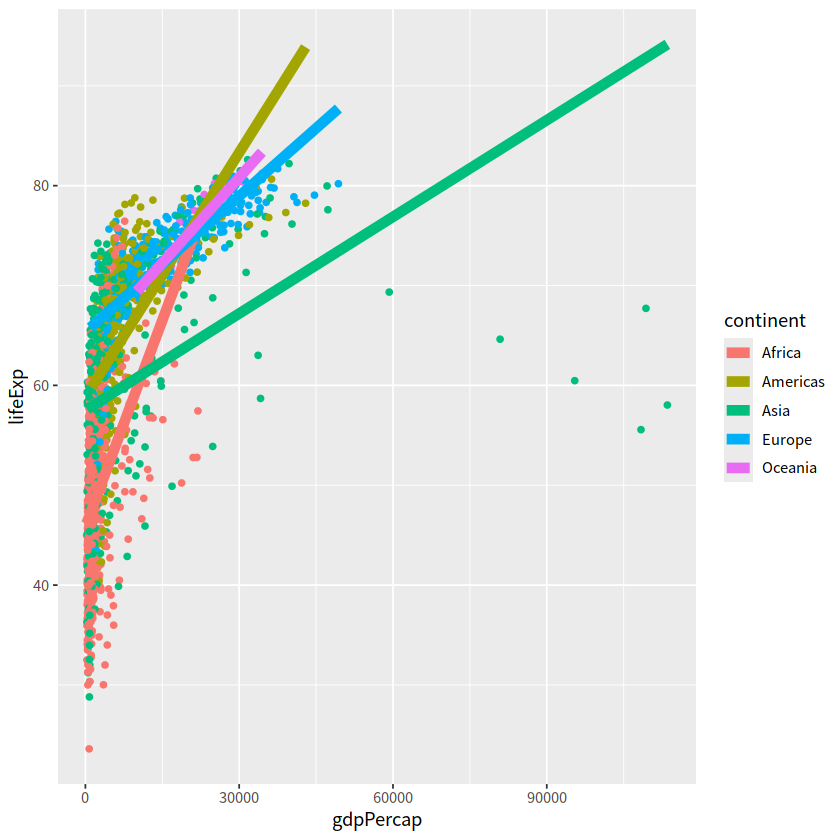

In [92]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, 
             color = continent))+
  geom_point()+
  geom_smooth(lwd = 3, se = FALSE, method = "lm")

`geom_smooth()` using formula = 'y ~ x'


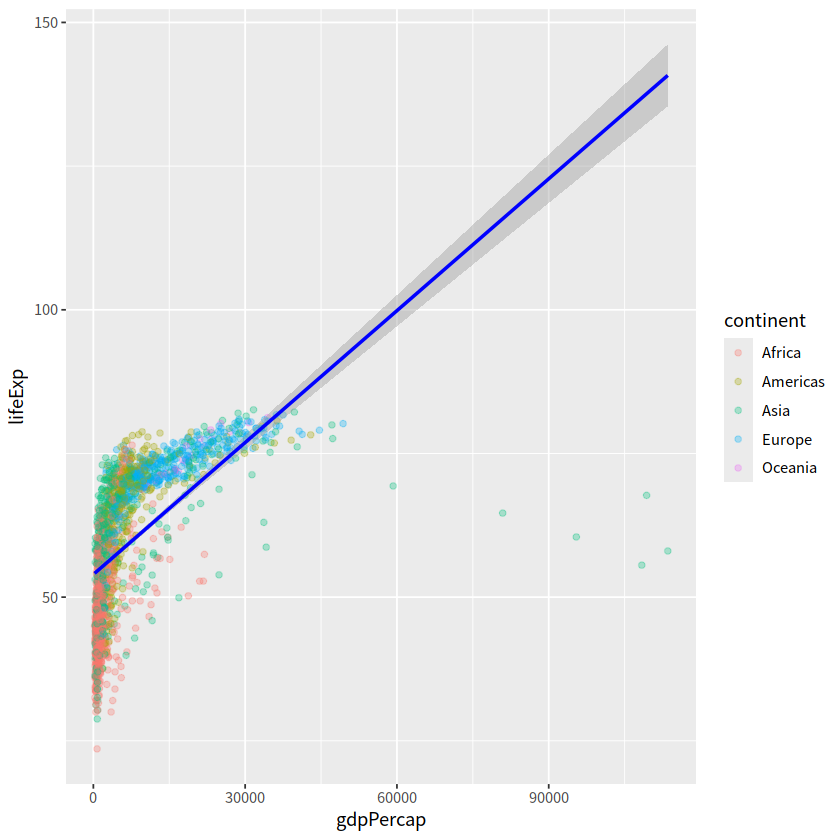

In [96]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, 
             color = continent))+
  geom_point(alpha = 0.3)+
  geom_smooth(lwd = 1, color = "blue", se = TRUE, method = "lm")

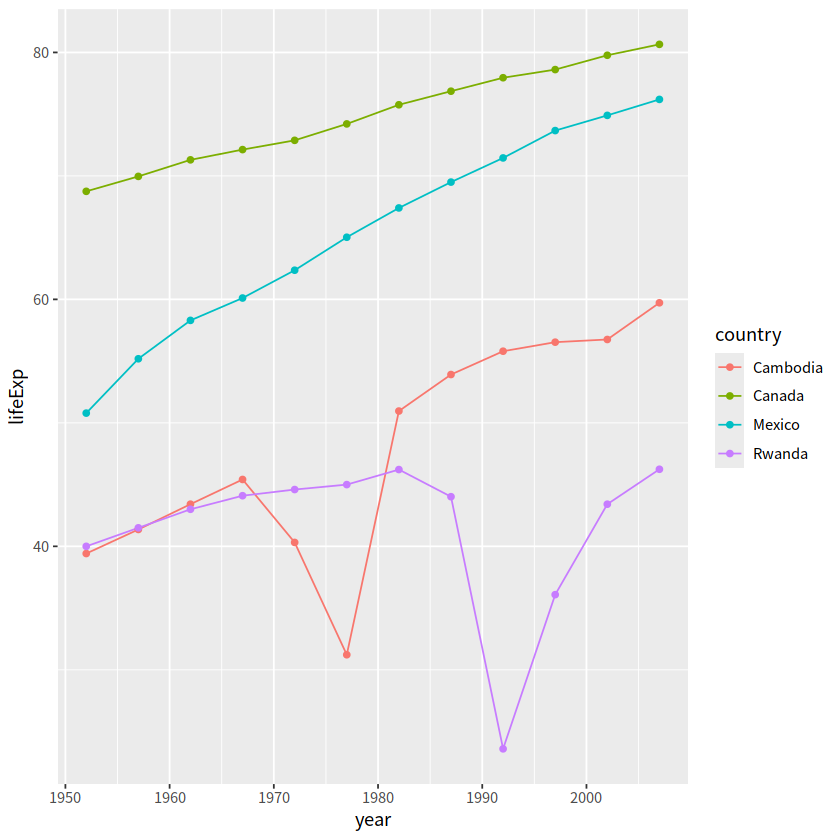

In [97]:
jCountries <- c("Canada", "Rwanda", "Cambodia", "Mexico")

gapdata %>% 
  filter(country %in% jCountries) %>% 
  ggplot(aes(x = year, y = lifeExp, color = country))+
  geom_line()+
  geom_point()

可以看到，图例的顺序和图中的顺序不太一致，

在设置color的时候可以对continent进行reorder

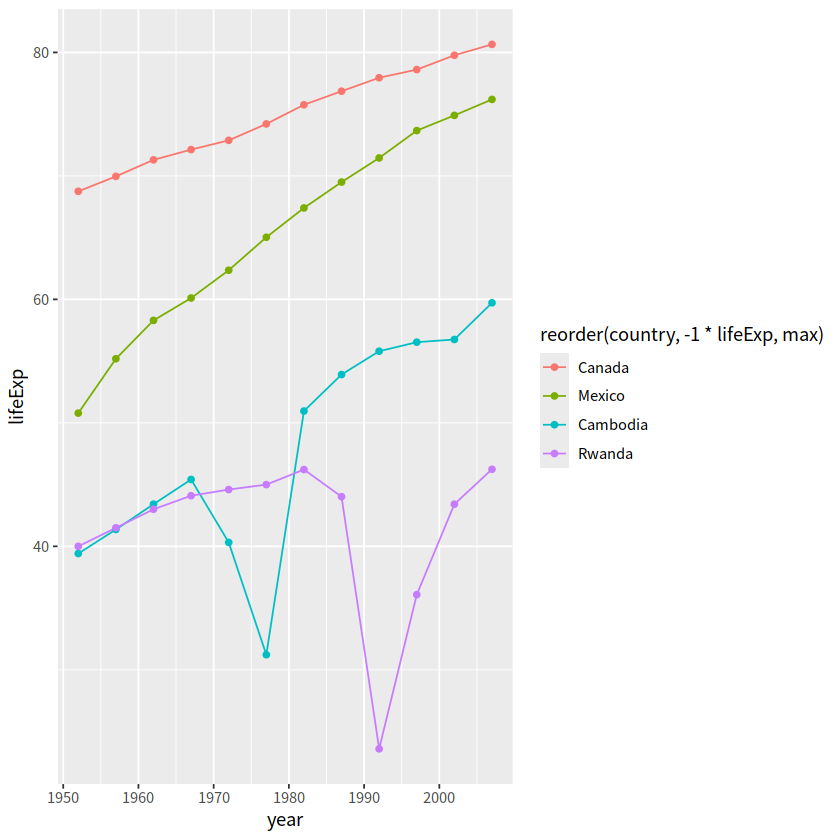

In [98]:
gapdata %>% 
  filter(country %in% jCountries) %>% 
  ggplot(aes(x = year, y = lifeExp, 
             color = reorder(country, -1 * lifeExp, max)
            ))+
  geom_line()+
  geom_point()

当然还有如下方式

利用`if_else`函数增加一列，并直接用`geom_label(aes(label = end_label))`讲其加入图中`max`那个点

Warning message:
“Removed 44 rows containing missing values or values outside the scale range (`geom_label()`).”


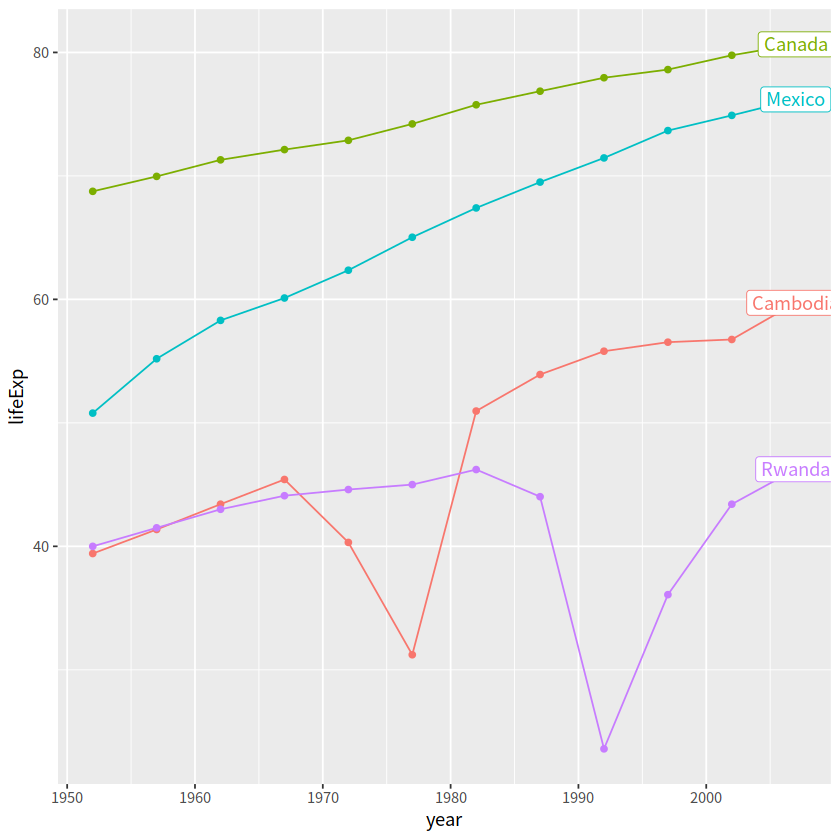

In [100]:
gapdata %>% 
  filter(country %in% jCountries) %>% 
  group_by(country) %>% 
  mutate(end_label = if_else(year == max(year), country, NA_character_)) %>% 
  ggplot(aes(x = year, y = lifeExp, 
            color = country))+
  geom_line()+
  geom_point()+
  geom_label(aes(label = end_label))+
  theme(legend.position = "none")

如果觉得麻烦，可以用`gghighlight`宏包

label_key: country



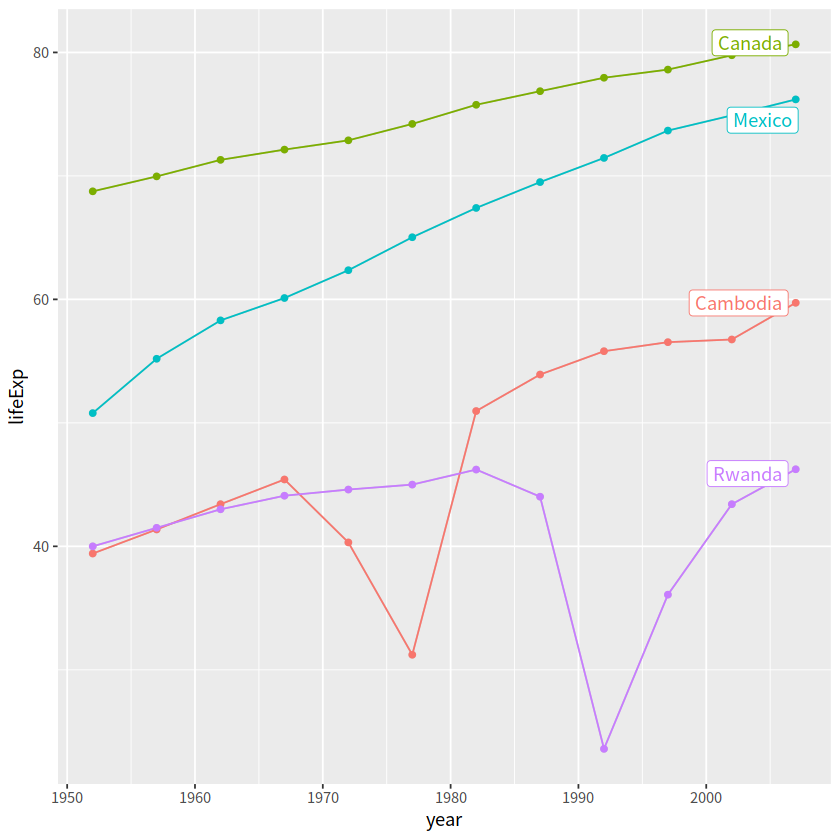

In [104]:
# install.packages("gghighlight")
library(gghighlight)
gapdata %>% 
  filter(country %in% jCountries) %>% 
  ggplot(aes(x = year, y = lifeExp,
             color = country))+
  geom_line()+
  geom_point()+
  gghighlight::gghighlight()

### 9 点线图
`geom_point() + geom_segment()`

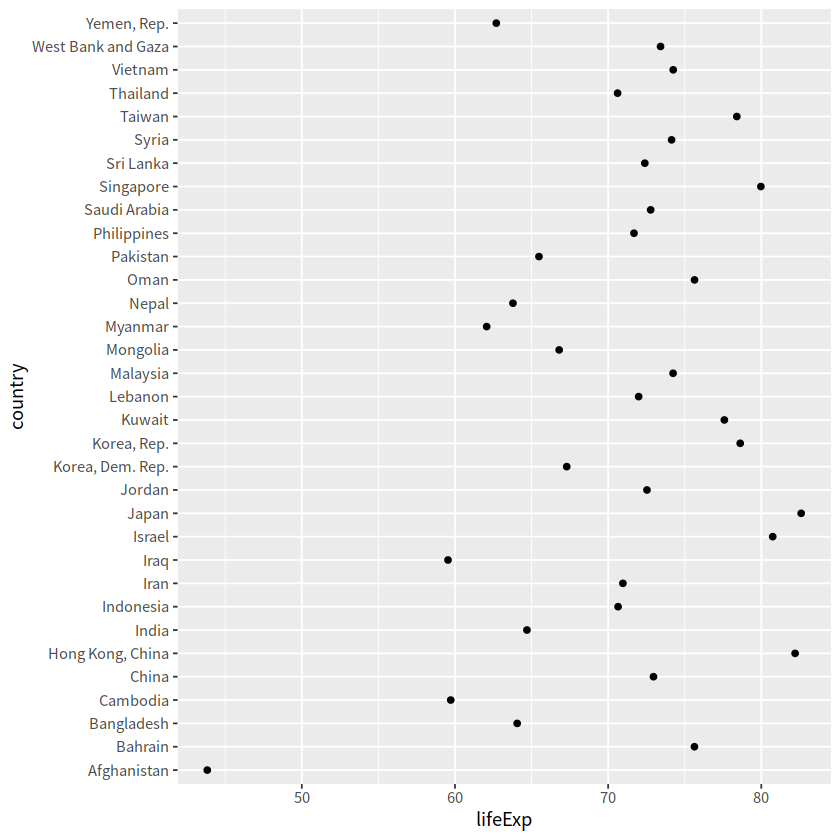

In [106]:
# 点图
gapdata %>% 
  filter(continent == "Asia" & year == 2007) %>% 
  ggplot(aes(x = lifeExp, y = country))+
  geom_point()

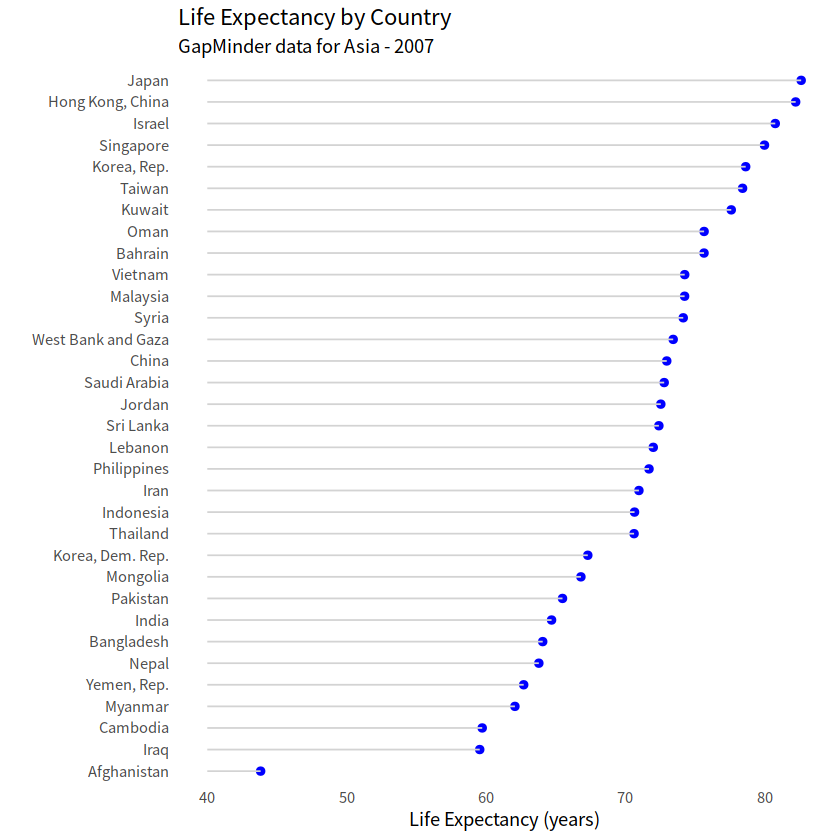

In [109]:
# 点线图
gapdata %>% 
  filter(continent == "Asia" & year == 2007) %>% 
  ggplot(aes(x = lifeExp, y = reorder(country, lifeExp),
             ))+
  geom_point(color = "blue", size = 2)+
  geom_segment(aes(x = 40, xend = lifeExp, 
                   y=reorder(country,lifeExp),yend=reorder(country,lifeExp)),
                   color = "lightgrey")+
  labs(x = "Life Expectancy (years)", y = "",
      title = "Life Expectancy by Country",
      subtitle = "GapMinder data for Asia - 2007")+
  theme_minimal()+
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

### 10 分面
- 分面有两个 - `facet_grid()` - `facet_wrap()`
#### 1 `facet_grid()`
- create a grid of graphs, by rows and columns
- use `vars()` to call on the variables
- adjust scales with `scales = "free"`

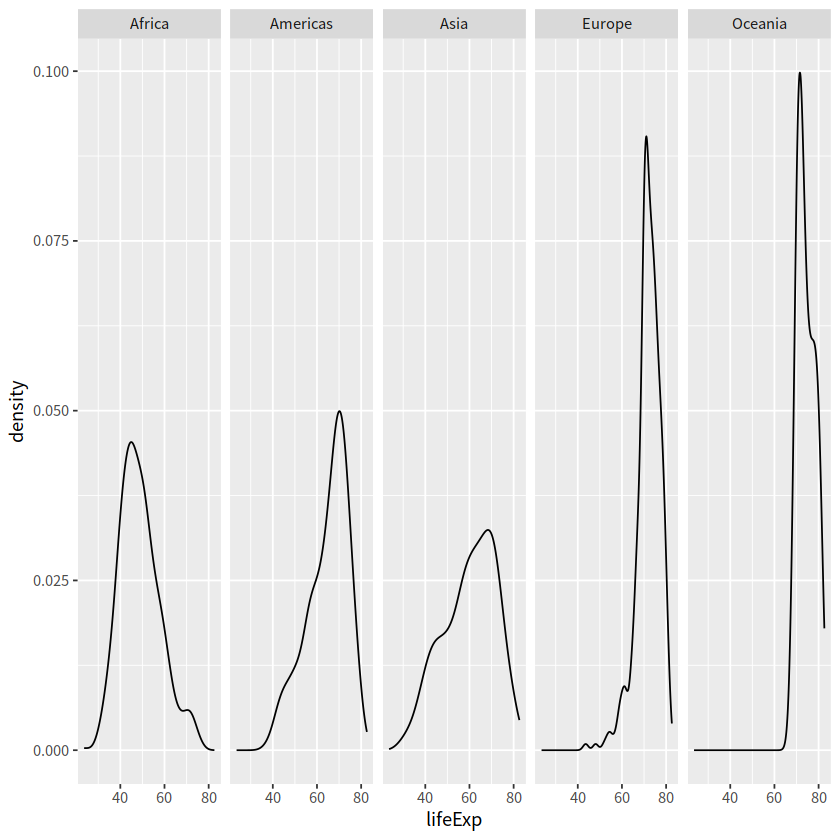

In [110]:
gapdata %>% 
  ggplot(aes(x = lifeExp)) +
  geom_density()+
  facet_grid(. ~ continent)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


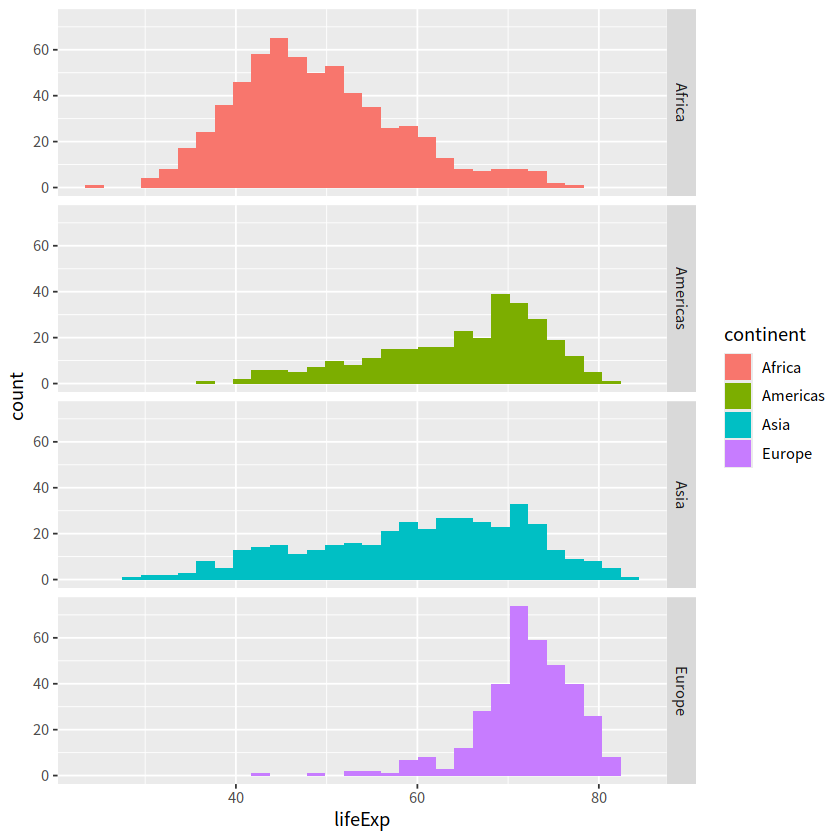

In [114]:
gapdata %>% 
  filter(continent != "Oceania") %>% 
  ggplot(aes(x = lifeExp, fill = continent))+
  geom_histogram()+
  facet_grid(continent ~ .)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


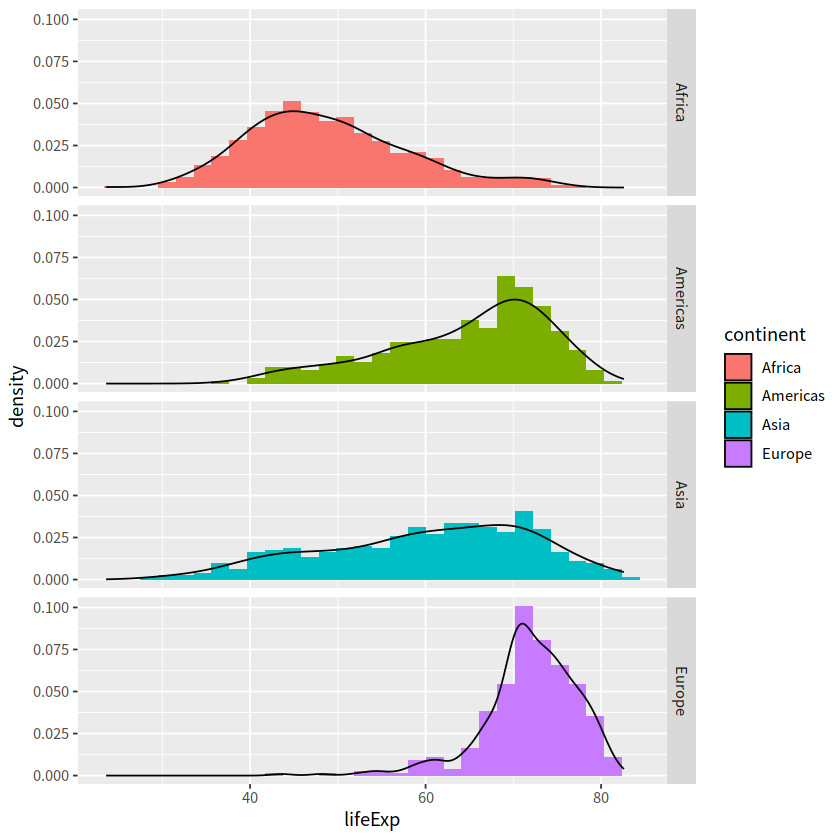

In [115]:
gapdata %>%   
  filter(continent != "Oceania") %>% 
  ggplot(aes(x = lifeExp, y = stat(density)))+
  geom_histogram(aes(fill = continent))+
  geom_density()+
  facet_grid(continent~ .)

#### 2 `facet_wrap()`
- create small multiples by “wrapping” a series of plots
- use `vars()` to call on the variables
- nrow and ncol arguments for dictating shape of grid

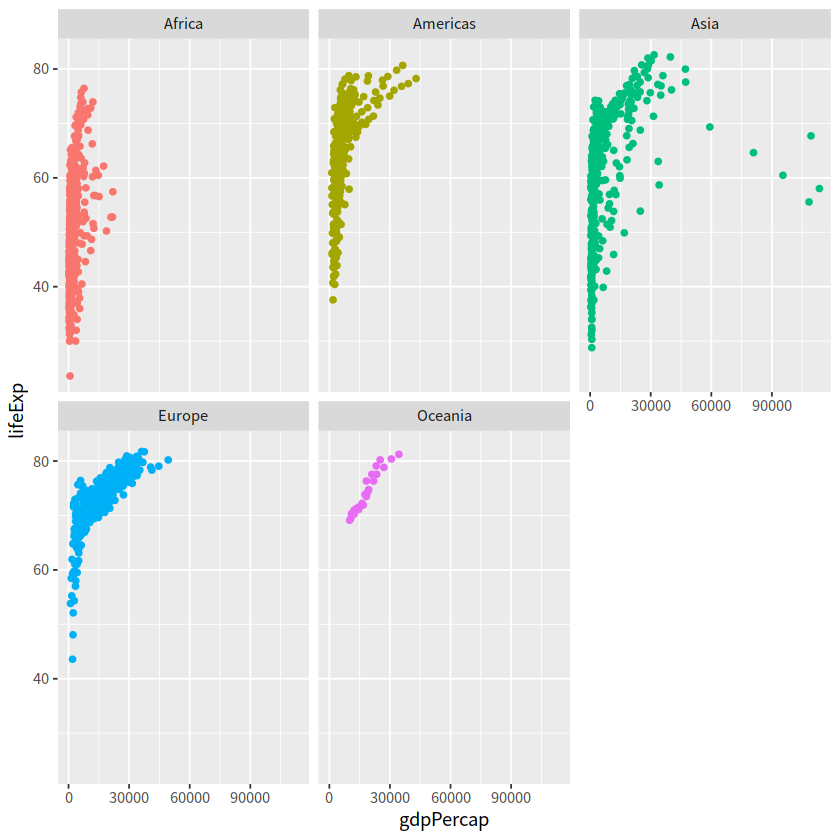

In [117]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent))+
  geom_point(show.legend = FALSE)+
  facet_wrap(~continent)

### 11 文本标注
`ggforce::geom_mark_ellipse()`

`ggrepel::geom_text_repel()`

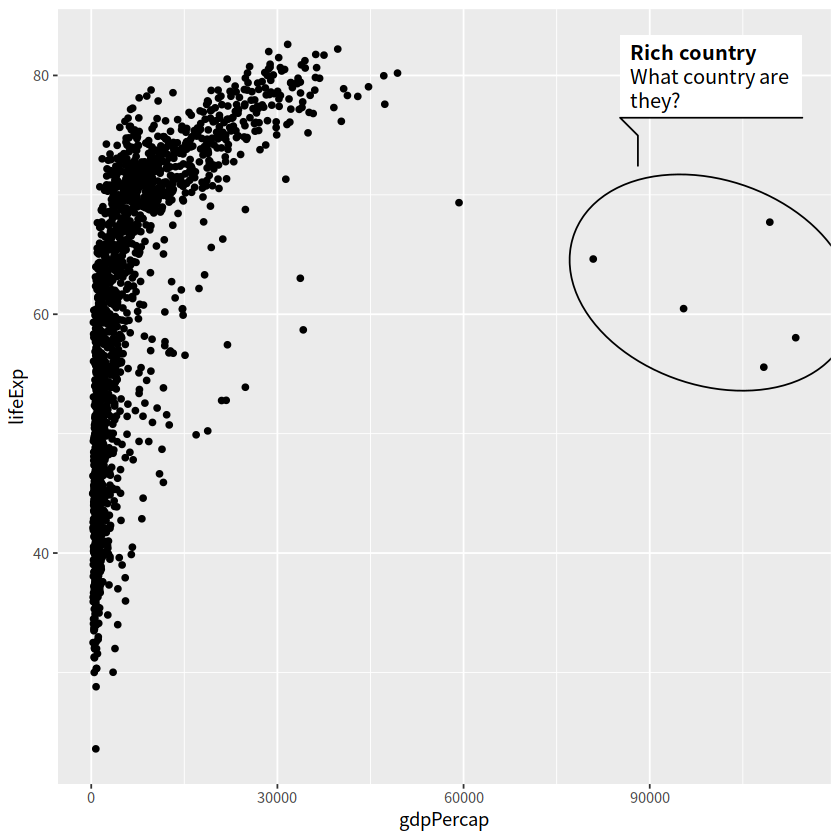

In [118]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point()+
  ggforce::geom_mark_ellipse(aes(
    filter = gdpPercap > 70000,
    label = "Rich country",
    description = "What country are they?"
  ))

In [123]:
ten_countries <- gapdata %>% 
  distinct(country) %>% 
  pull() %>%
  sample(10)
ten_countries

[1] "Zimbabwe"      "Kenya"         "Uganda"        "Yemen, Rep."  
 [5] "United States" "Gambia"        "Myanmar"       "Canada"       
 [9] "Cote d'Ivoire" "Honduras"

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


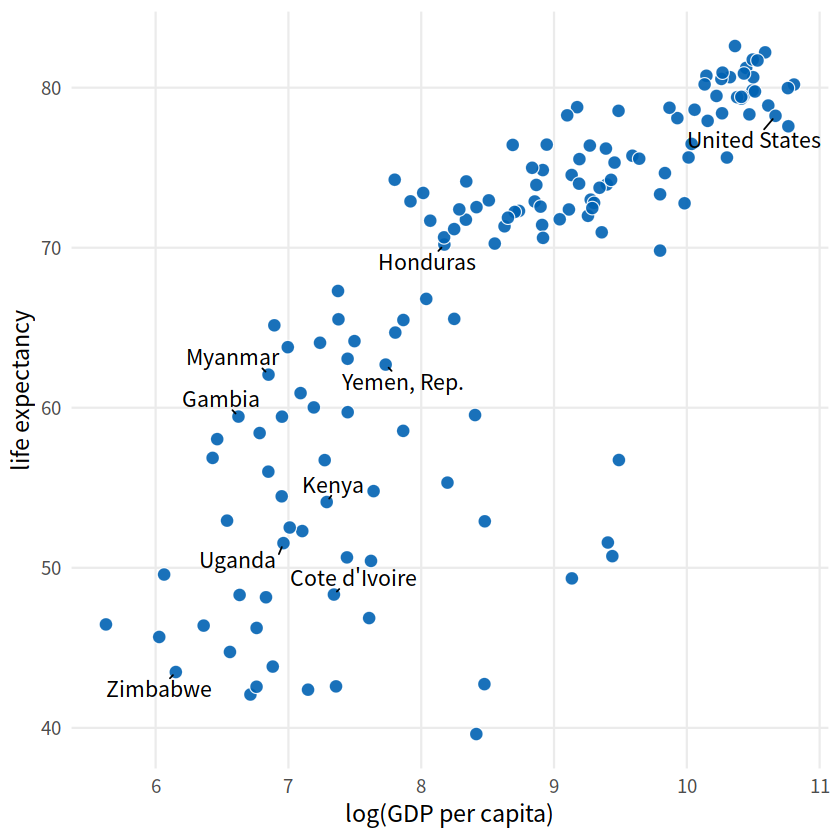

In [126]:
library(ggrepel)
gapdata %>% 
  filter(year == 2007) %>% 
  mutate(
    label = ifelse(country %in% ten_countries, as.character(country), "")
  ) %>% 
  ggplot(aes(log(gdpPercap), lifeExp))+
  geom_point(size = 3.5, alpha = 0.9, shape = 21, 
            col = "white", fill = "#0162B2")+
  geom_text_repel(aes(label = label), size = 4.5,
                 point.padding = 0.2, box.padding = 0.3,
                 force = 1, min.segment.length = 0)+
  theme_minimal(14)+
  theme(legend.position = "none",
       panel.grid.minor = element_blank())+
  labs(x = "log(GDP per capita)",
       y = "life expectancy")

### 12 errorbar图
`geom_errorbar()`

In [128]:
avg_gapdata <- gapdata %>% 
  group_by(continent) %>% 
  summarise(mean = mean(lifeExp), sd = sd(lifeExp)
           )
avg_gapdata

continent mean     sd       
1 Africa    48.86533  9.150210
2 Americas  64.65874  9.345088
3 Asia      60.06490 11.864532
4 Europe    71.90369  5.433178
5 Oceania   74.32621  3.795611

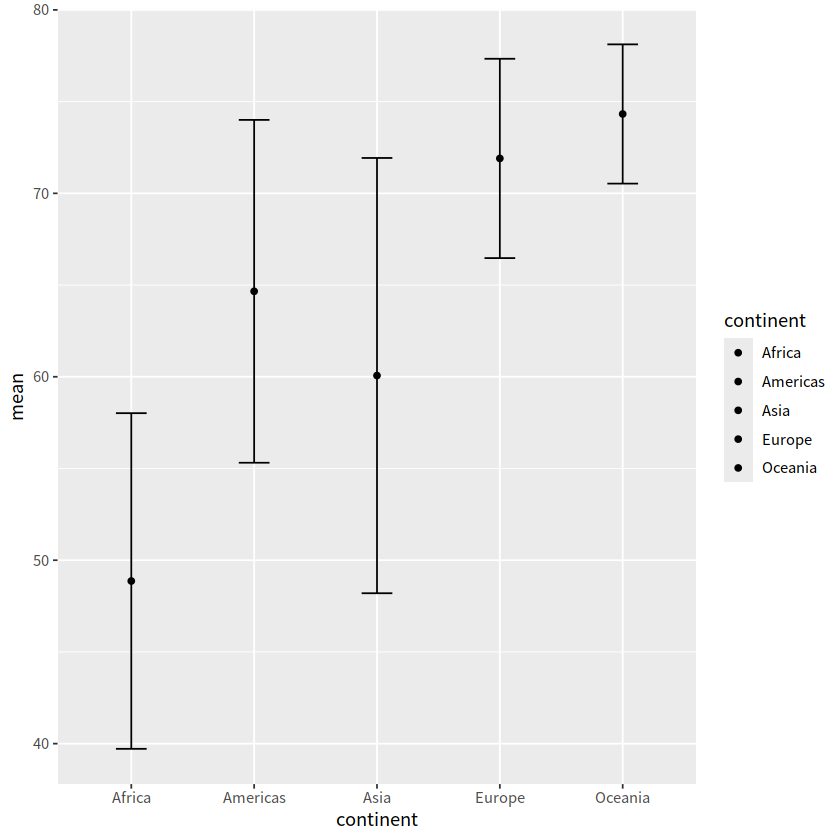

In [131]:
avg_gapdata %>% 
  ggplot(aes(continent, mean, fill = continent))+
  geom_point()+
  geom_errorbar(aes(ymin = mean - sd, ymax = mean + sd),
               width = 0.25)

### 13 椭圆图
`stat_ellipse(type = "norm", level = 0.95)`,也就是添加置信区间

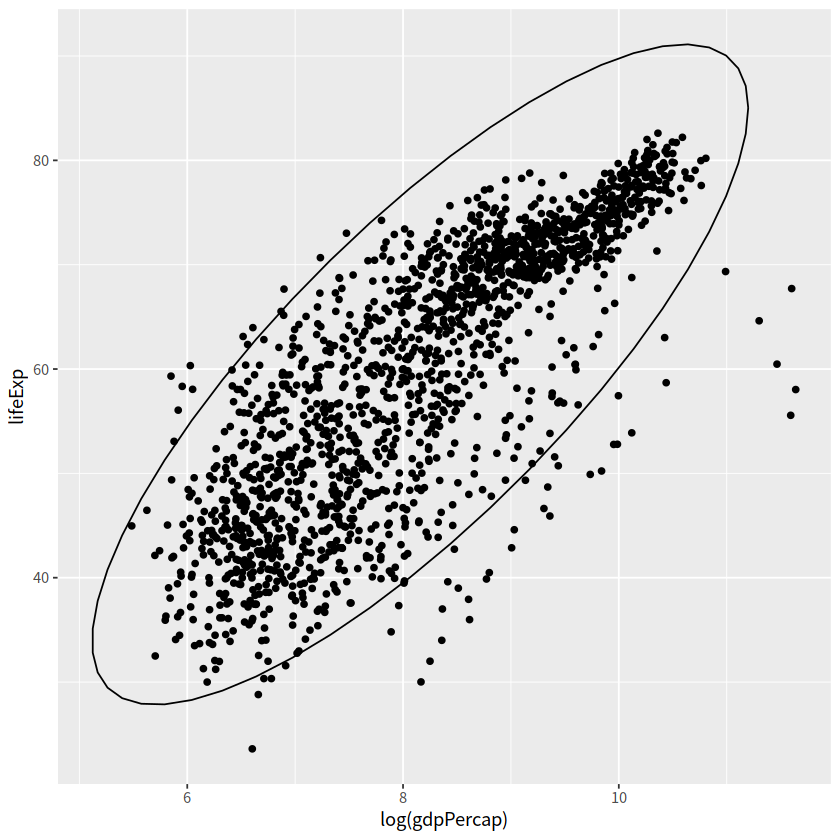

In [132]:
gapdata %>% 
  ggplot(aes(x = log(gdpPercap), y = lifeExp))+
  geom_point()+
  stat_ellipse(type = "norm", level = 0.95)

### 14 2D 密度图
与一维的情形`geom_density()`类似， `geom_density_2d()`, `geom_bin2d()`, `geom_hex()`常用于刻画两个变量构成的二维区间的密度

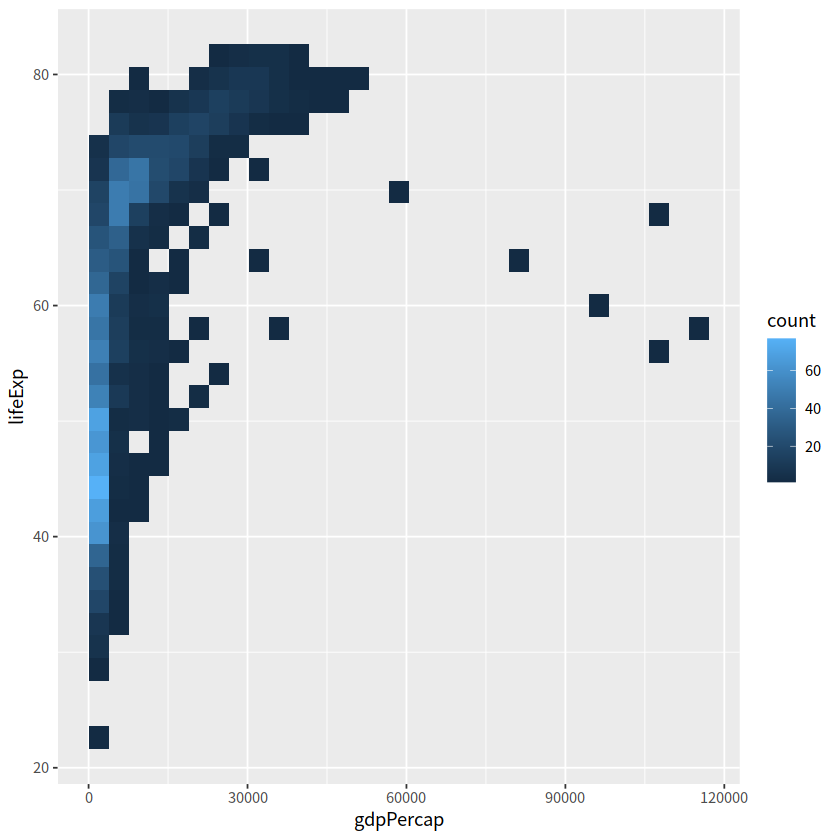

In [136]:
#geom_bin2d()
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_bin2d()

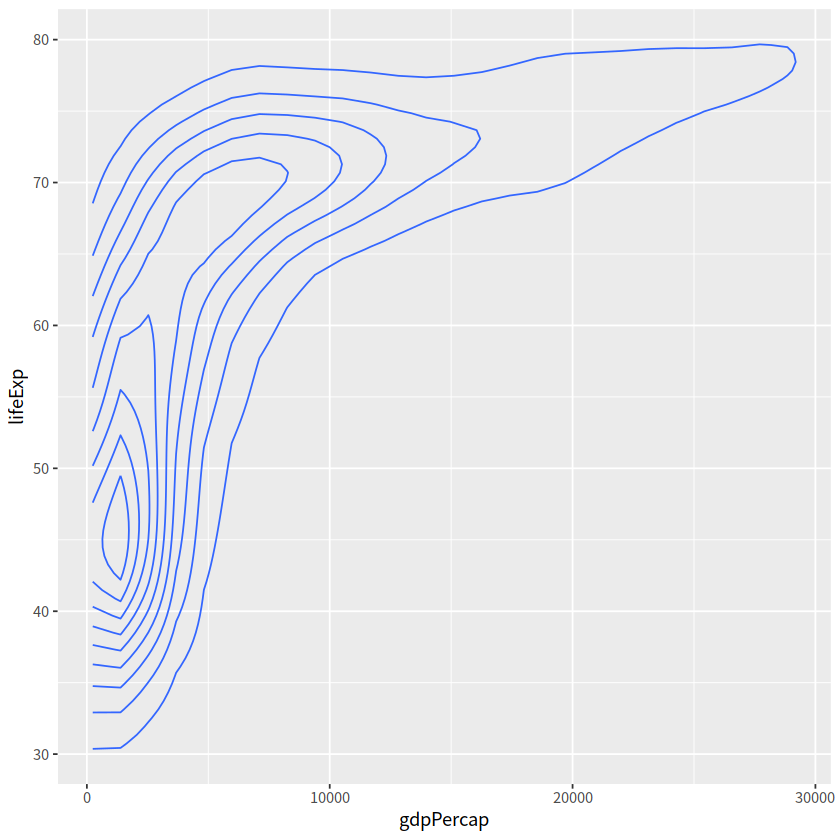

In [135]:
# geom_density2d()
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_density2d()

### 15 马赛克图
`geom_tile()`， `geom_contour()`， `geom_raster()`常用于3个变量

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


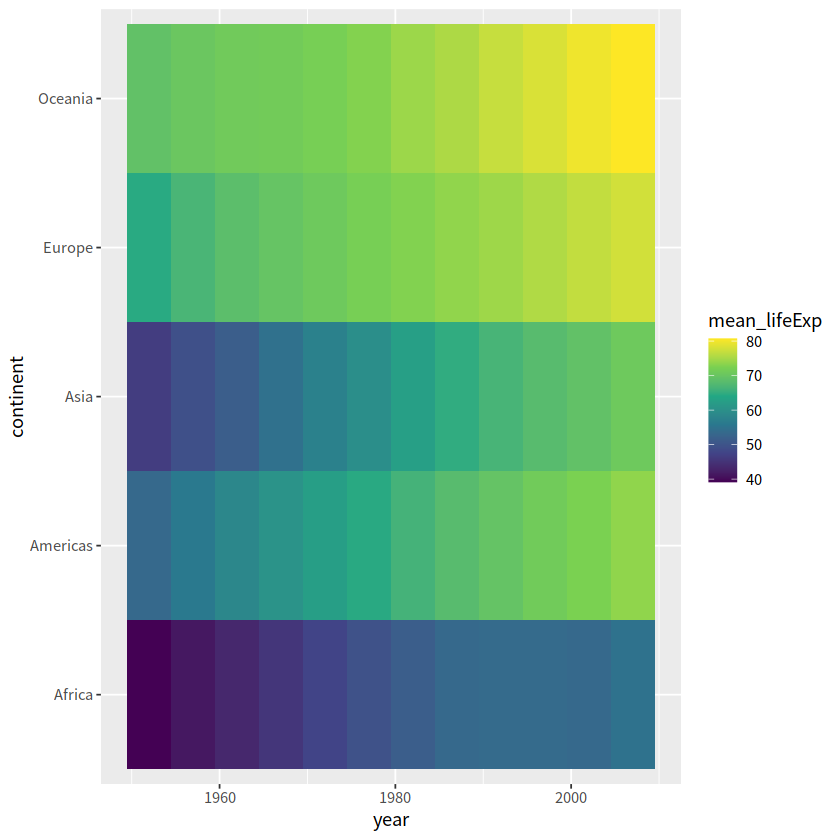

In [144]:
gapdata %>% 
  group_by(continent, year) %>% 
  summarise(mean_lifeExp = mean(lifeExp)) %>% 
  ggplot(aes(x = year, y = continent, fill = mean_lifeExp))+
  geom_tile()+
  scale_fill_viridis_c()

事实上可以有更好的呈现方式

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


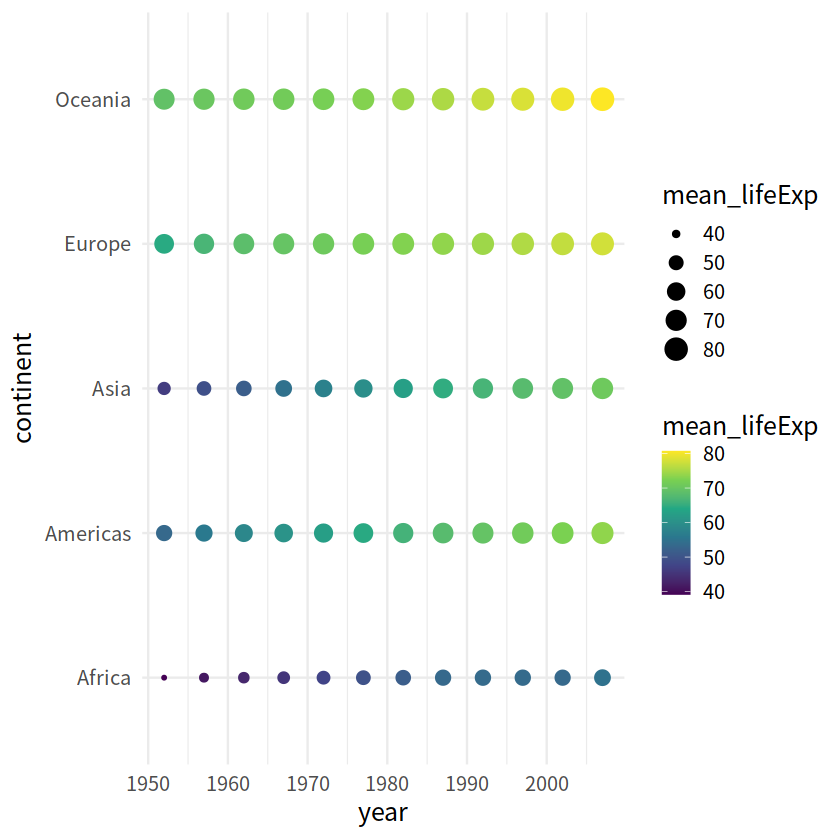

In [153]:
gapdata %>% 
  group_by(continent, year) %>% 
  summarise(mean_lifeExp = mean(lifeExp)) %>% 
  ggplot(aes(x = year, y = continent, 
             size = mean_lifeExp, color = mean_lifeExp))+
  geom_point()+
  scale_color_viridis_c()+
  theme_minimal(15)

把数值放入点中

`geom_text()`

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.


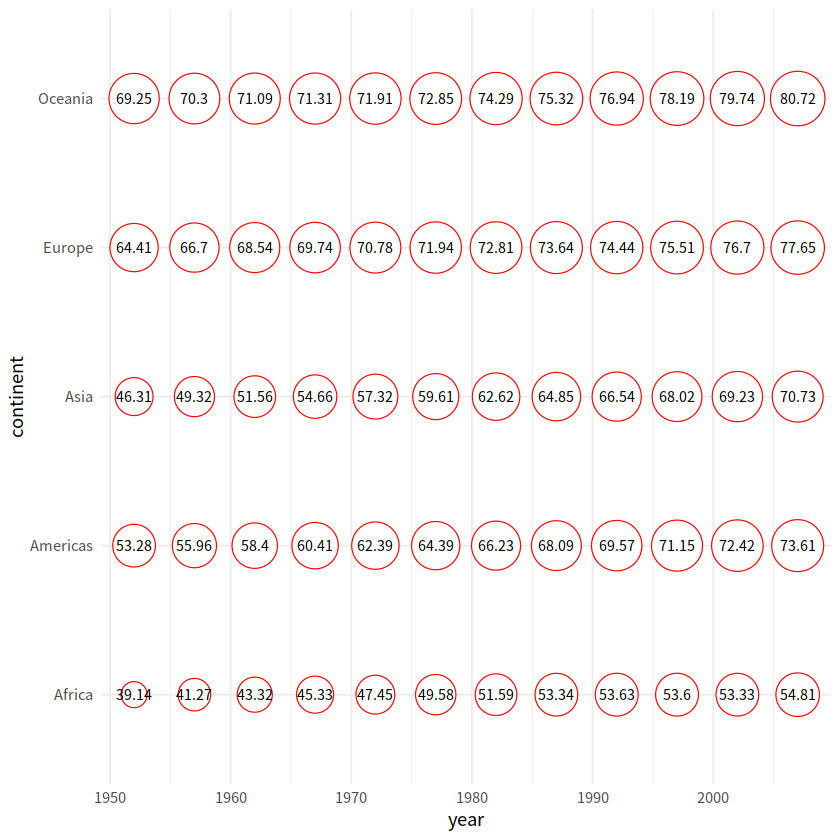

In [159]:
gapdata %>% 
  group_by(continent, year) %>% 
  summarise(mean_lifeExp = mean(lifeExp)) %>% 
  ggplot(aes(x = year, y = continent, size = mean_lifeExp))+
  geom_point(shape = 21, color = "red", fill = "white")+
  scale_size_continuous(range = c(7, 15))+
  geom_text(aes(label = round(mean_lifeExp, 2)), size = 3, color = "black")+
  theme_minimal()+
  theme(legend.position = "none")

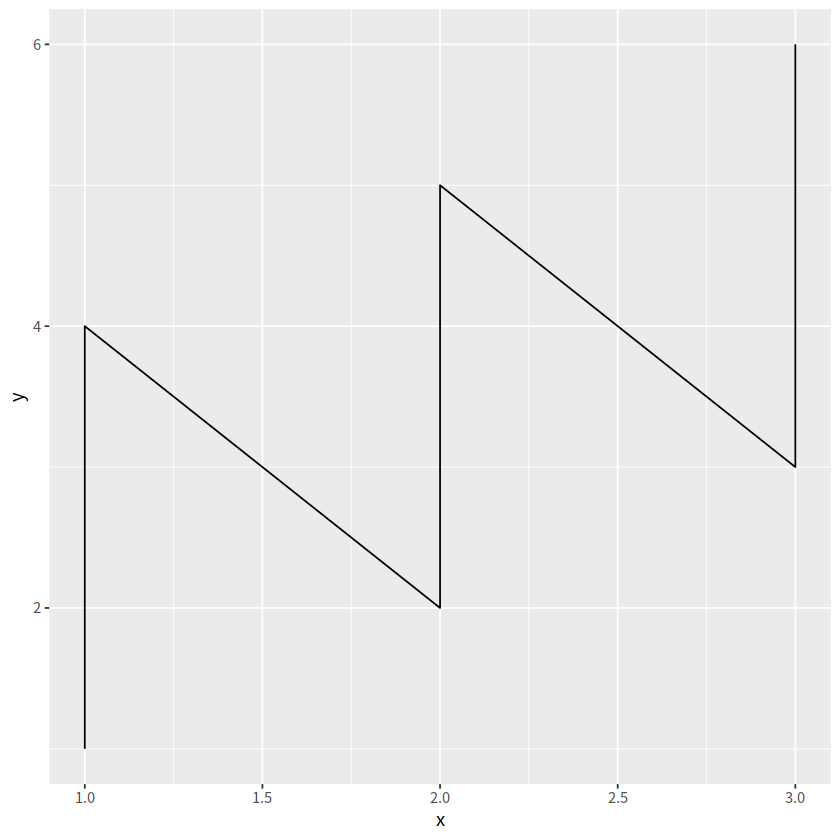

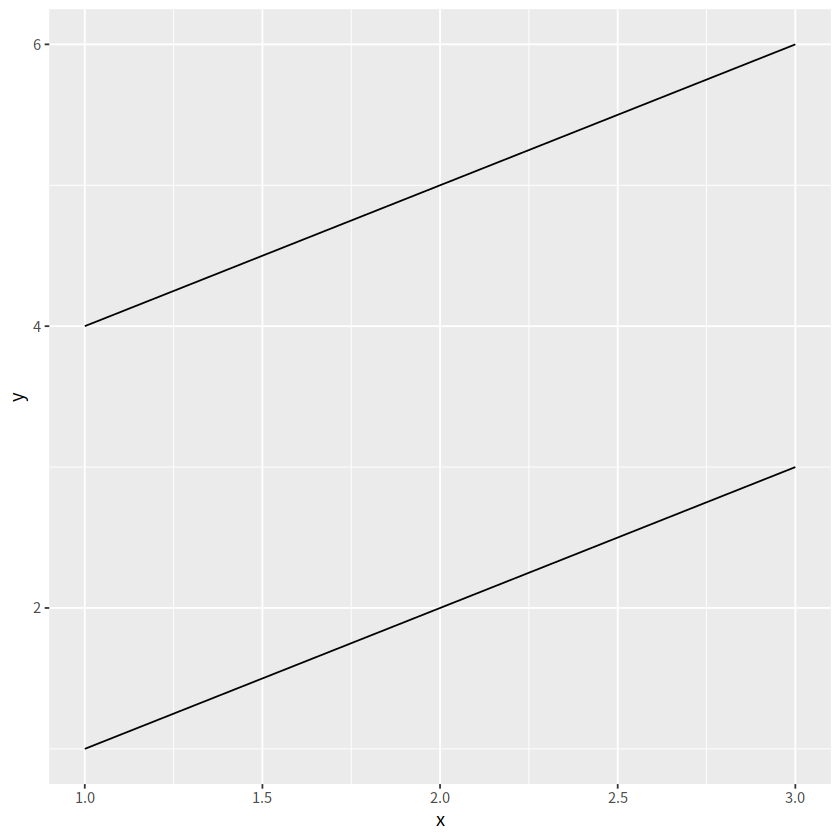

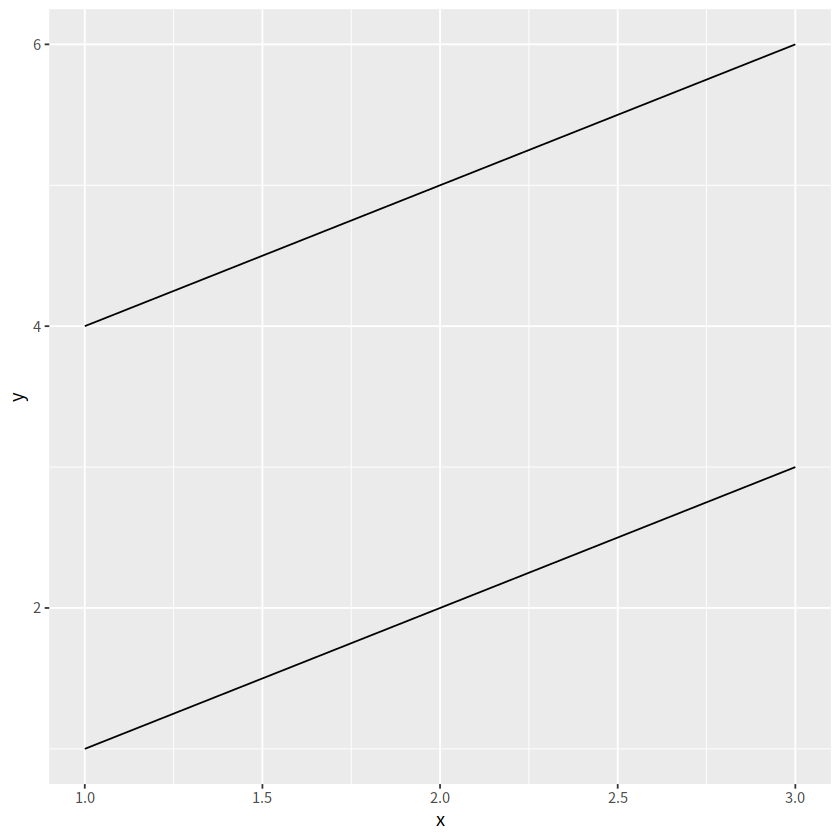

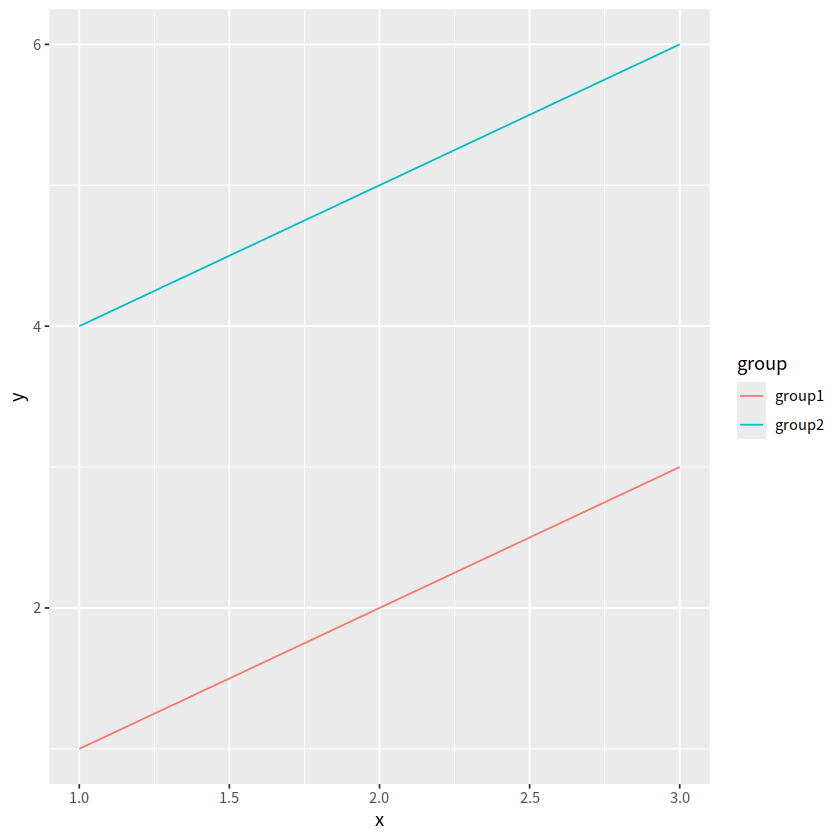

In [160]:
library(tidyverse)
tbl <-
  tibble(
    x = rep(c(1, 2, 3), times = 2),
    y = 1:6,
    group = rep(c("group1", "group2"), each = 3)
  )
ggplot(tbl, aes(x, y)) + geom_line()
ggplot(tbl, aes(x, y, group = group)) + geom_line()
ggplot(tbl, aes(x, y, fill = group)) + geom_line()
ggplot(tbl, aes(x, y, color = group)) + geom_line()